# Plotting 1/24/24

In [1]:
from plotting_utils import (
    plot_forecast,
    plot_crps_bydate,
    score_improvement_bysite,
    plot_improvement_bysite,
    plot_global_percentages,
    plot_region_percentages,
    plot_site_type_percentages_bymodel,
    plot_site_type_percentages_global,
    plot_window_and_sitetype_performance,
    generate_metadata_df,
)
import pandas as pd

targets = pd.read_csv("targets.csv.gz")
metadata = generate_metadata_df()

/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [2]:
merged_df = score_improvement_bysite('BlockRNN', targets, 'oxygen', suffix='default', )

Now let's get dataframes for all the models

In [3]:
model_names = ["RNN", "TFT", "BlockRNN", "Transformer",
               "NLinear", "DLinear", "NBEATS", "TCN"]
target_variables = ['oxygen', 'temperature', 'chla']
scores_dict = {}
for model in model_names:
    scores_dict[model] = {}
    for target_variable in target_variables:
        scores_dict[model][target_variable] = score_improvement_bysite(model, targets, target_variable, suffix='default')

Write something to save these because processing takes a while

In [4]:
for model in model_names:
    for target_variable in target_variables:
        scores_dict[model][target_variable].to_csv(
            f'scores/{model}_{target_variable}.csv', index=False
        )

And, to load.

In [5]:
scores_dict = {}
model_names = ["RNN", "TFT", "BlockRNN", "Transformer",
               "NLinear", "DLinear", "NBEATS", "TCN"]
target_variables = ['oxygen', 'temperature', 'chla']

for model in model_names:
    scores_dict[model] = {}
    for target_variable in target_variables:
        scores_dict[model][target_variable] = pd.read_csv(f'scores/{model}_{target_variable}.csv')

### Global Performance

#### Historical Comparison

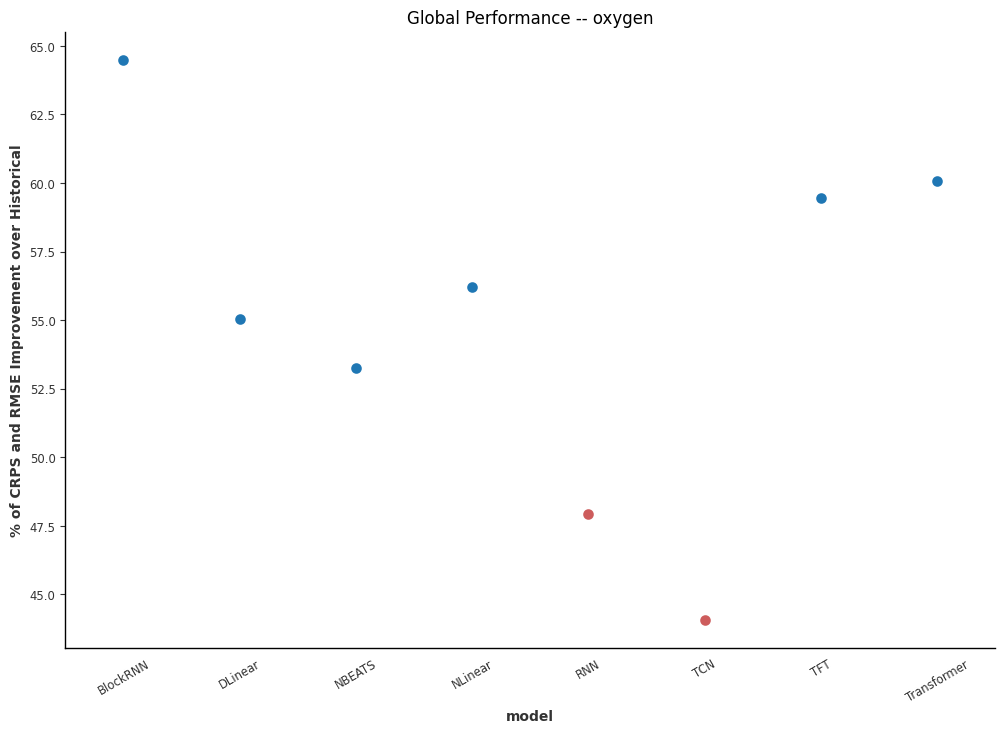

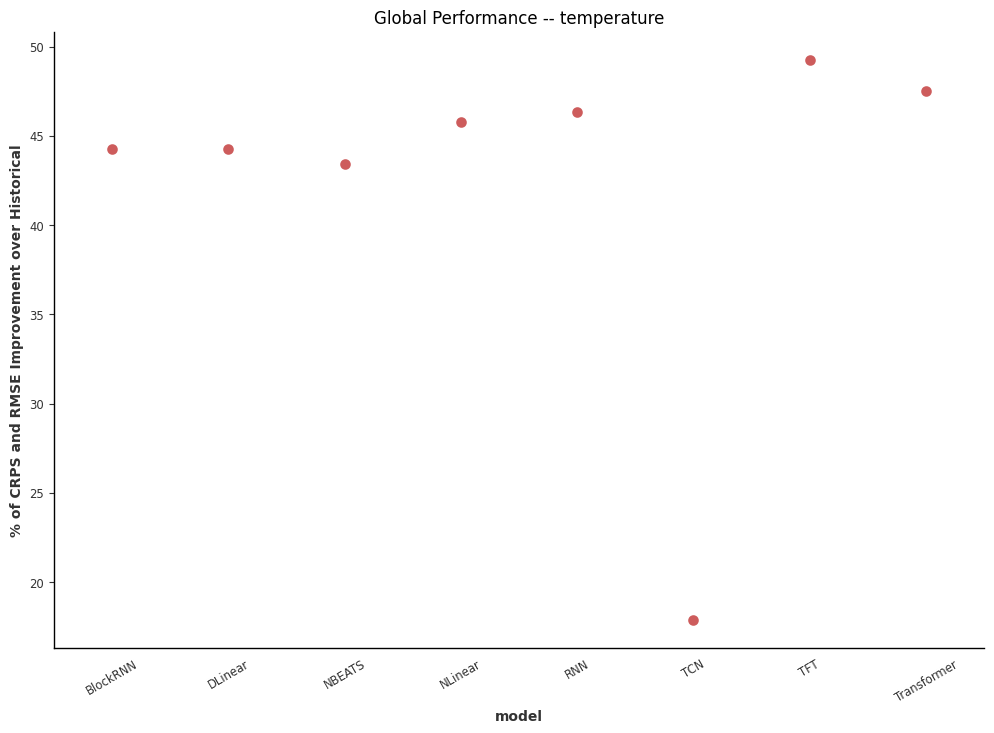

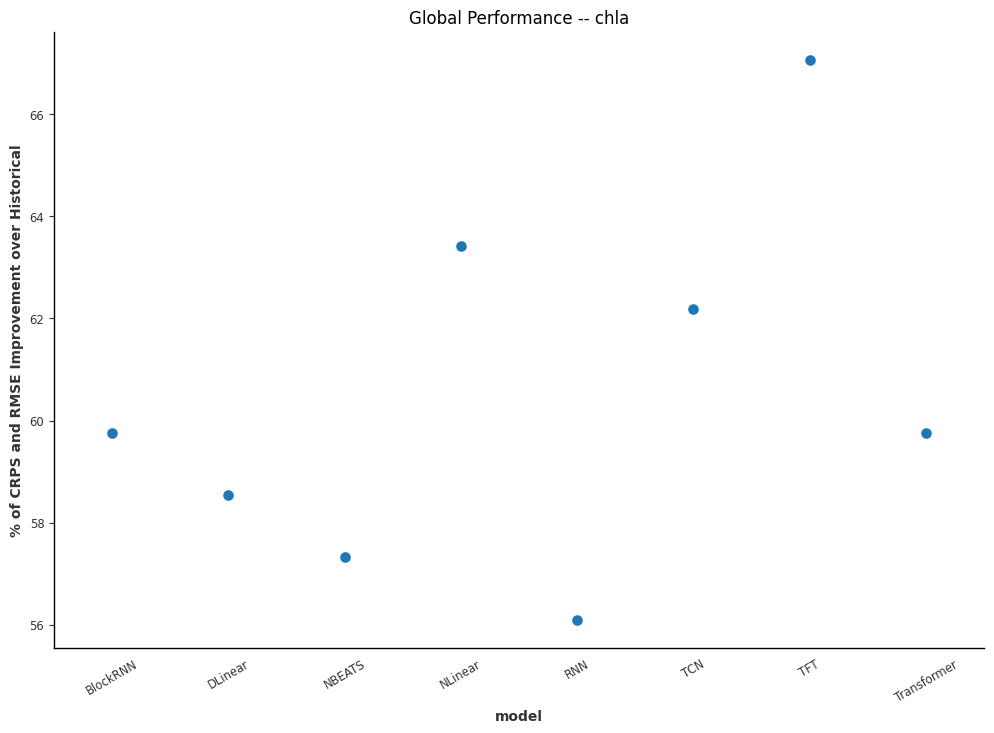

In [6]:
global_dfs = {}
# Also taking liberty here of making a dataframe to collate scores across models
for target_variable in target_variables:
    global_dfs[target_variable] = pd.concat([scores_dict[model][target_variable] for model in model_names])
    plot_global_percentages(global_dfs[target_variable], f'Global Performance -- {target_variable}')

#### Naive Persistence Comparison

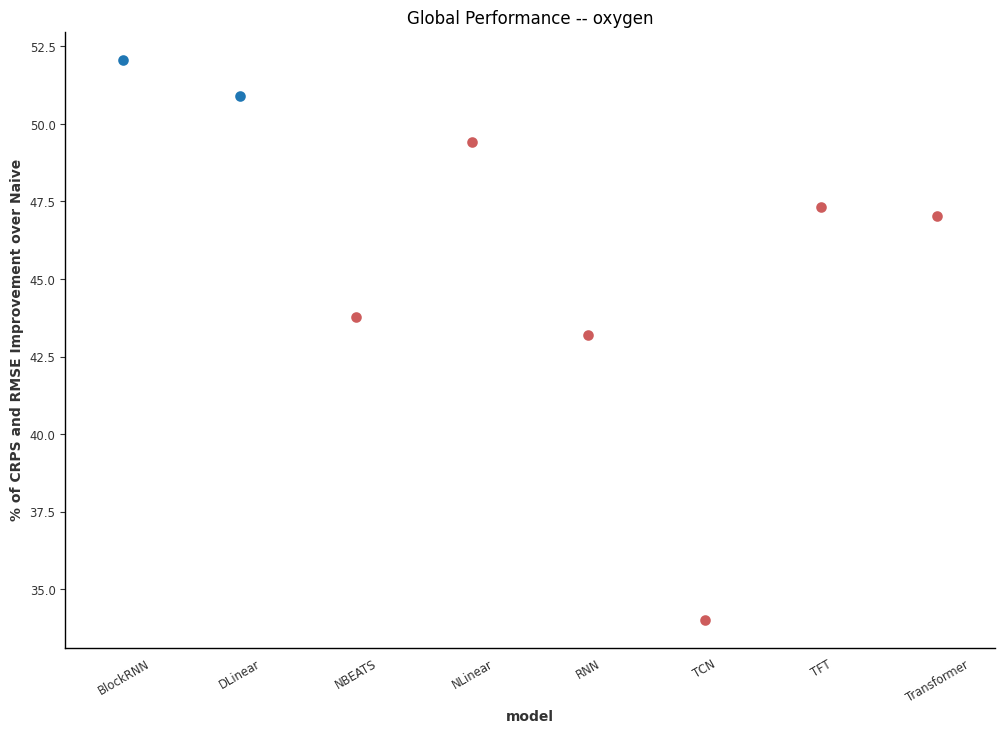

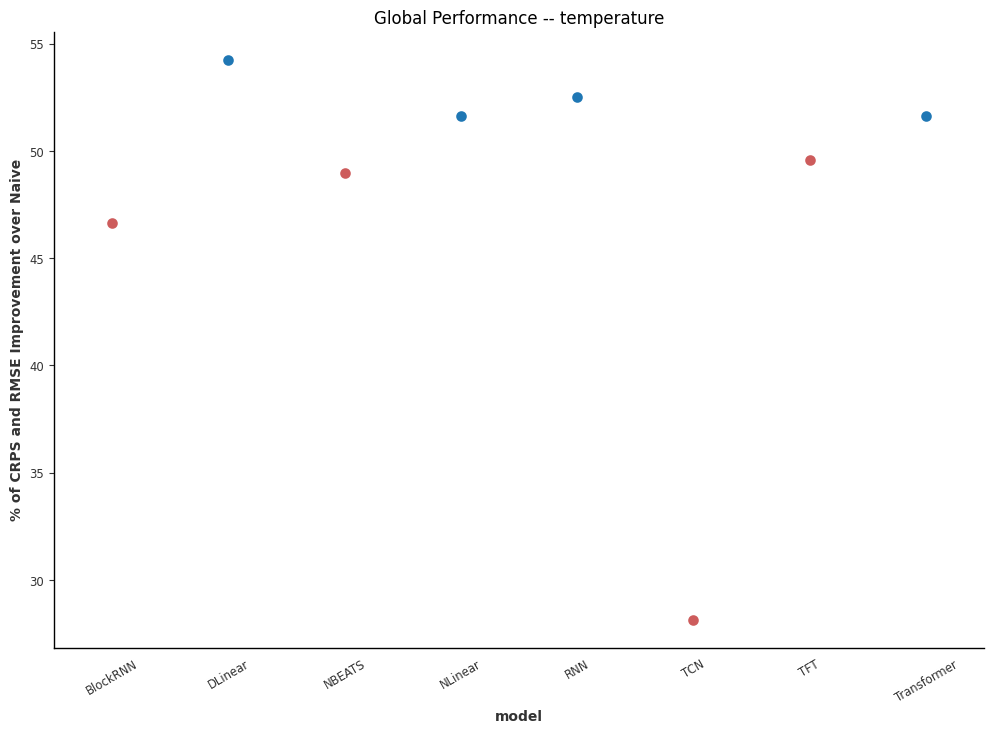

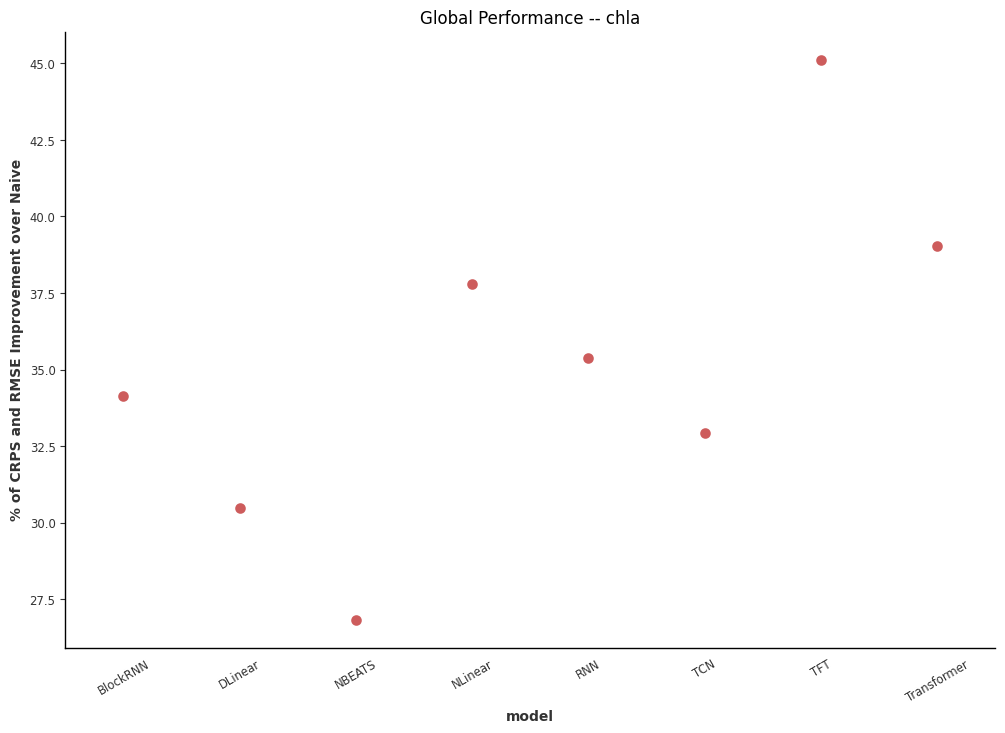

In [7]:
for target_variable in target_variables:
    plot_global_percentages(global_dfs[target_variable], f'Global Performance -- {target_variable}', historical=False)

### Global Performance by water body type

#### Historical Comparison

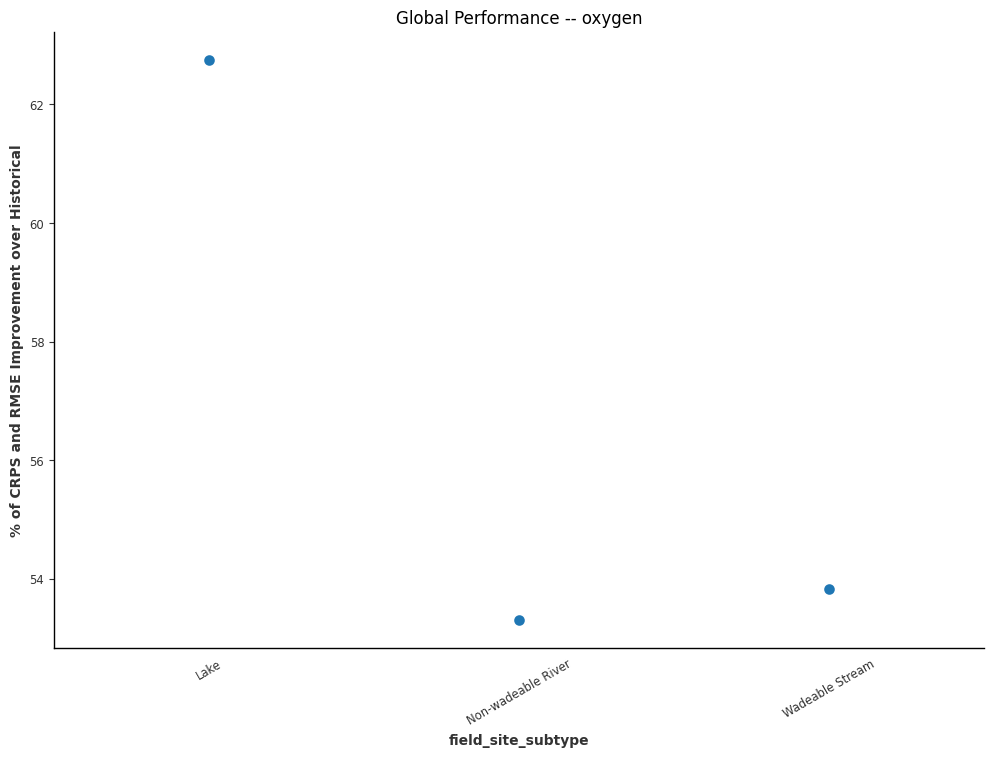

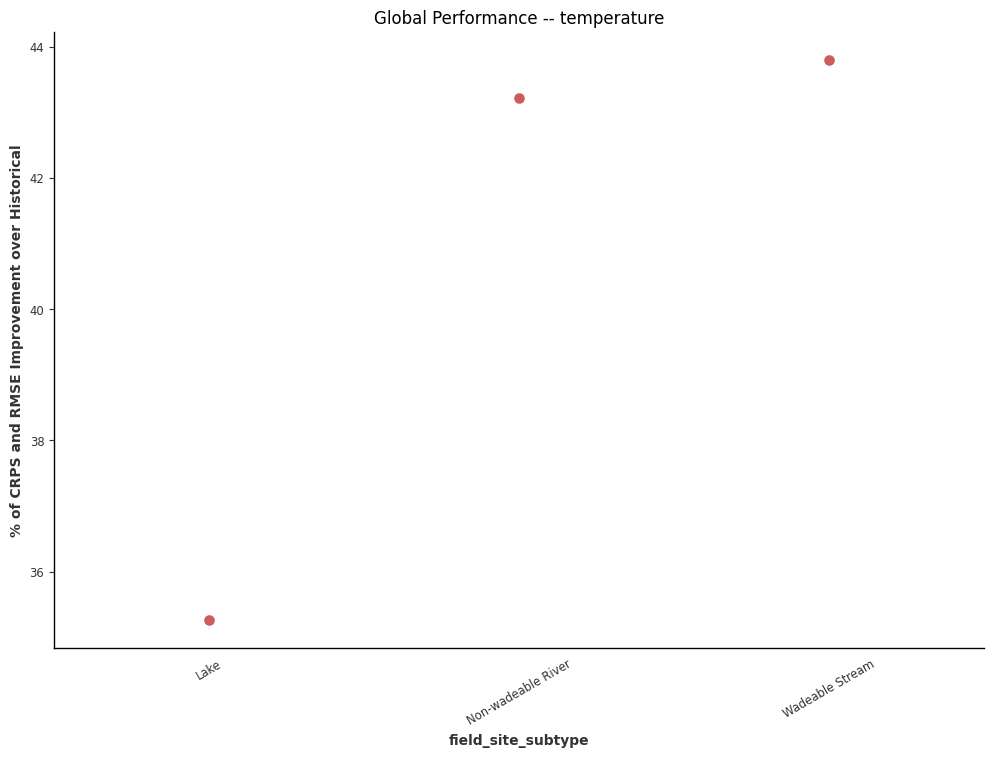

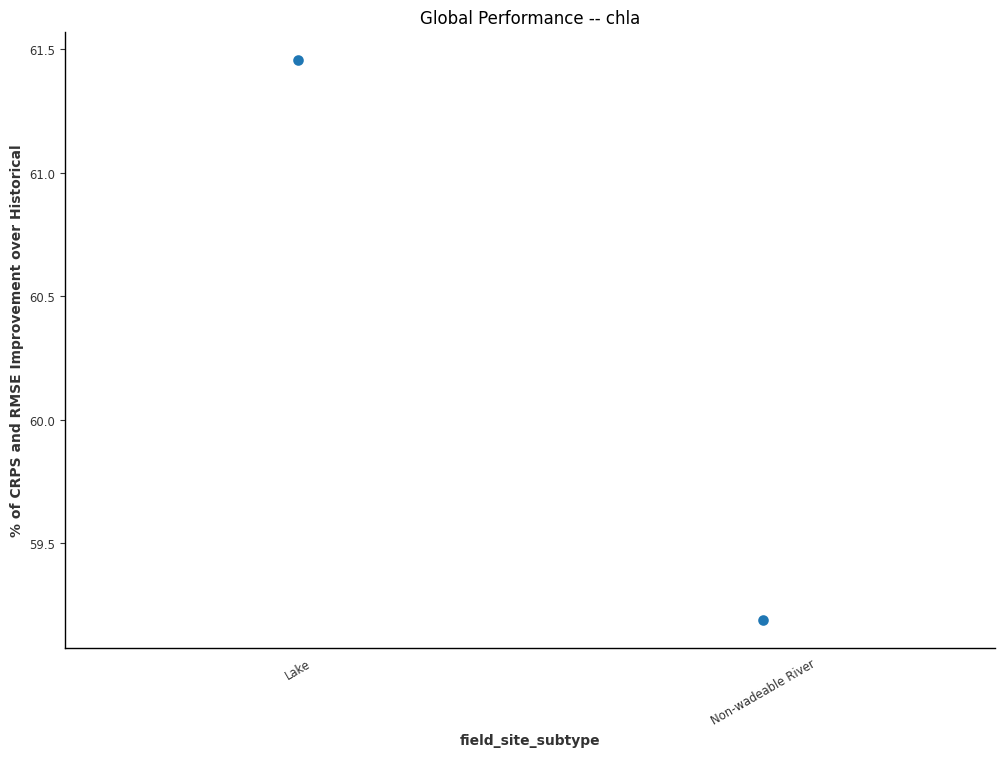

In [8]:
for target_variable in target_variables:
    plot_site_type_percentages_global(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}')

#### Naive Persistence Comparison

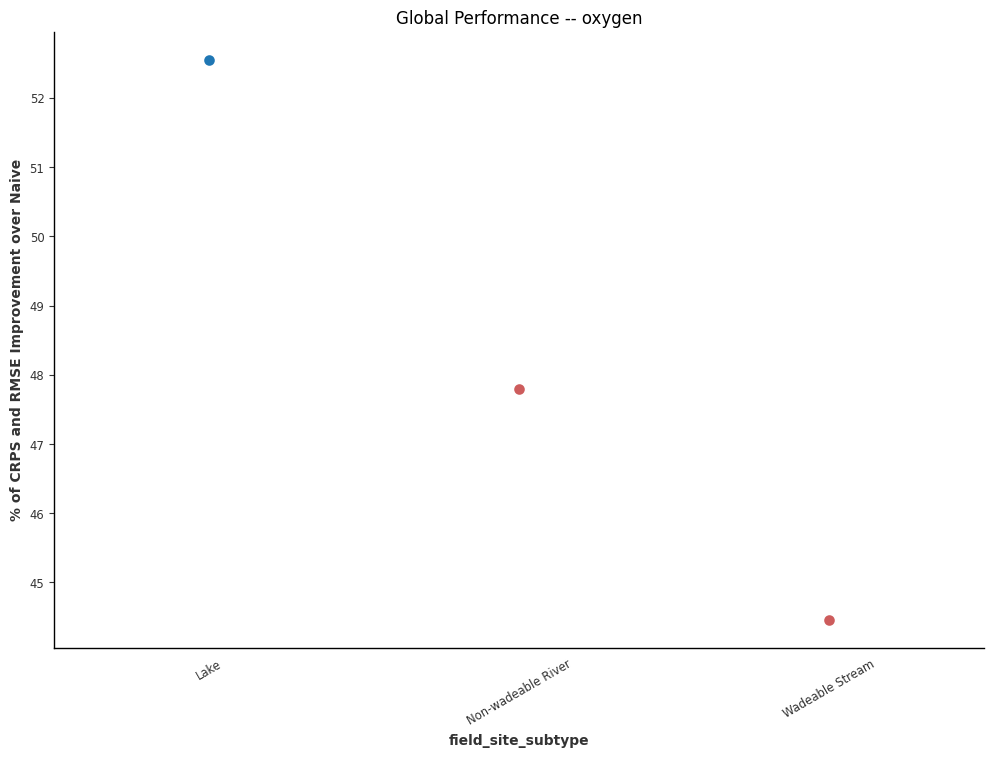

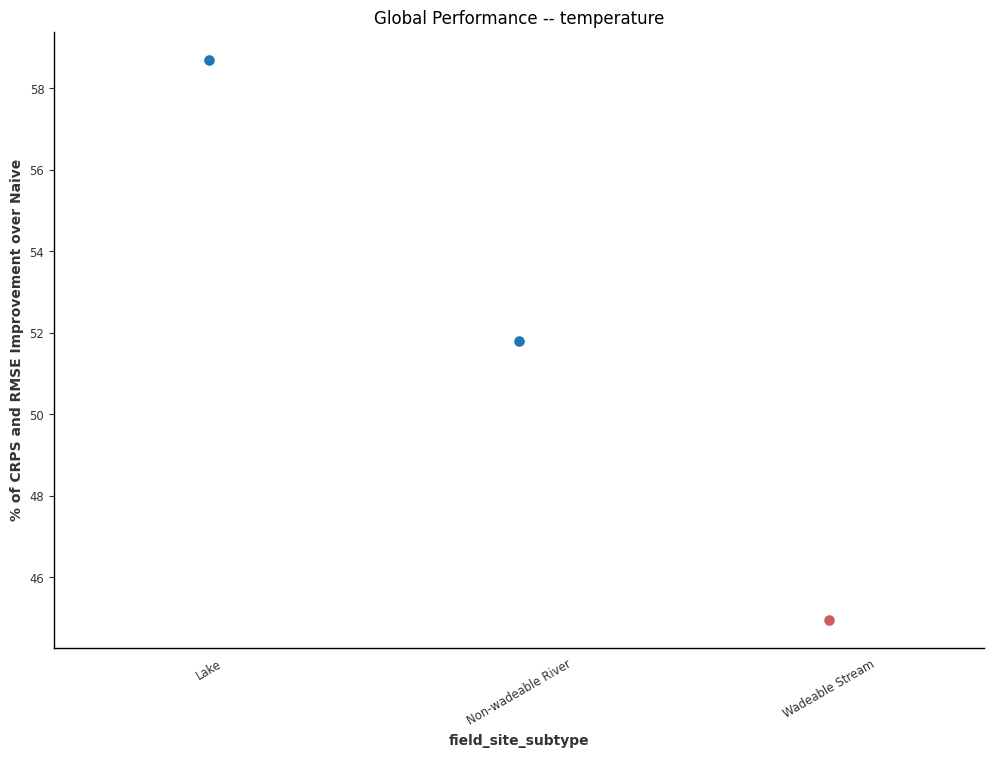

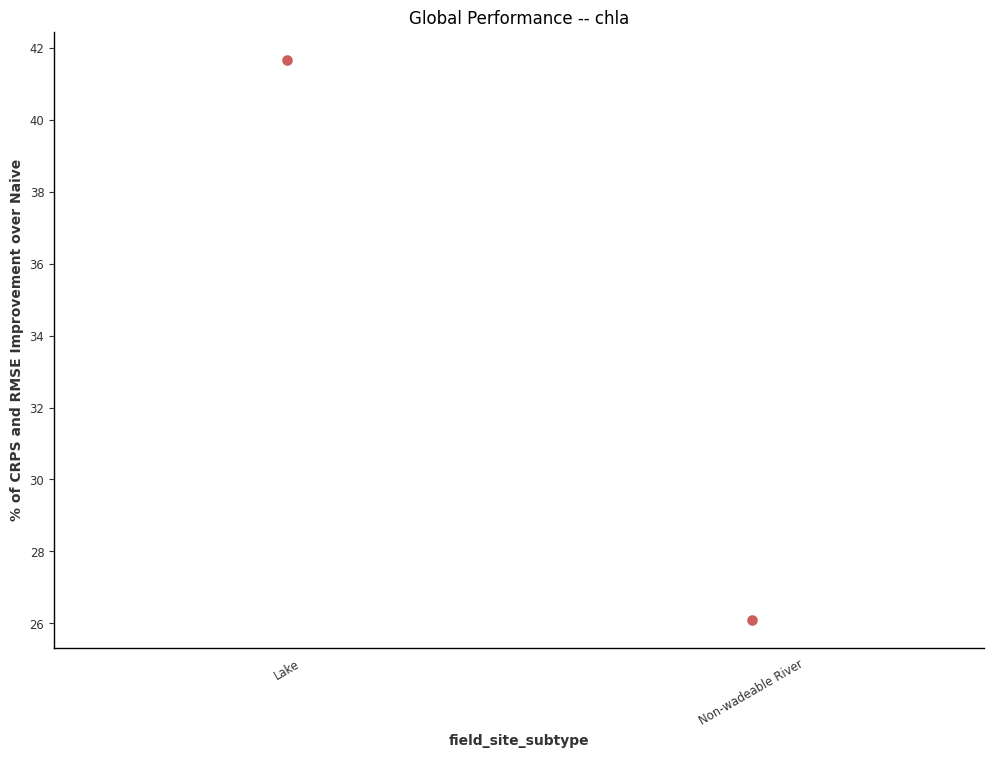

In [9]:
for target_variable in target_variables:
    plot_site_type_percentages_global(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}', historical=False)

### Model Performance by water body type

#### Historical Comparison

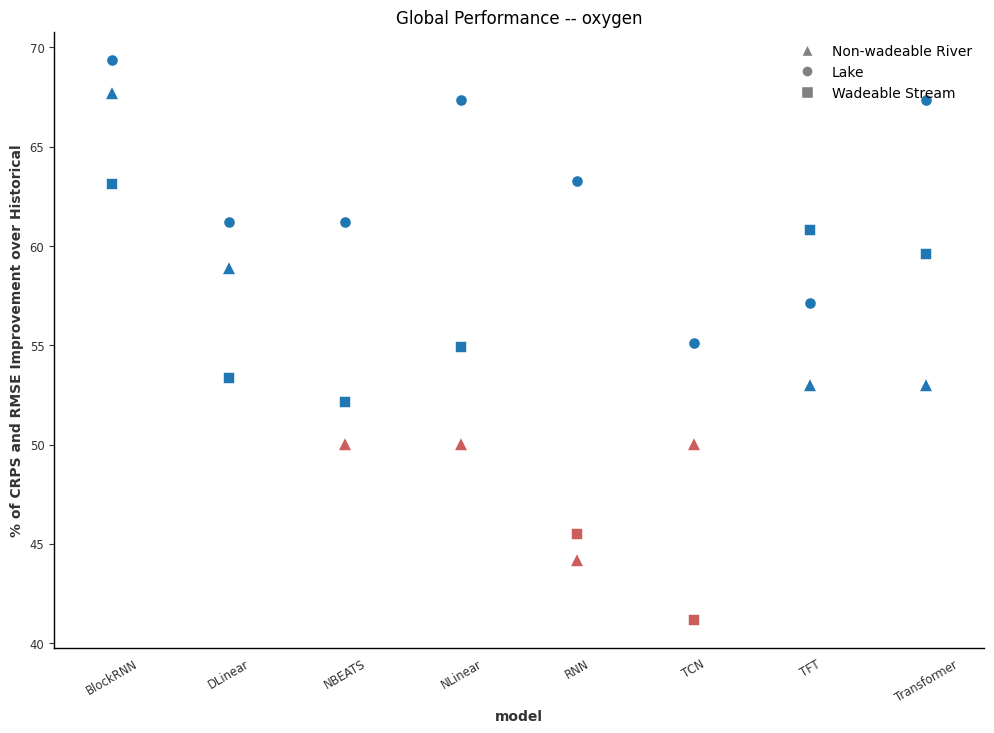

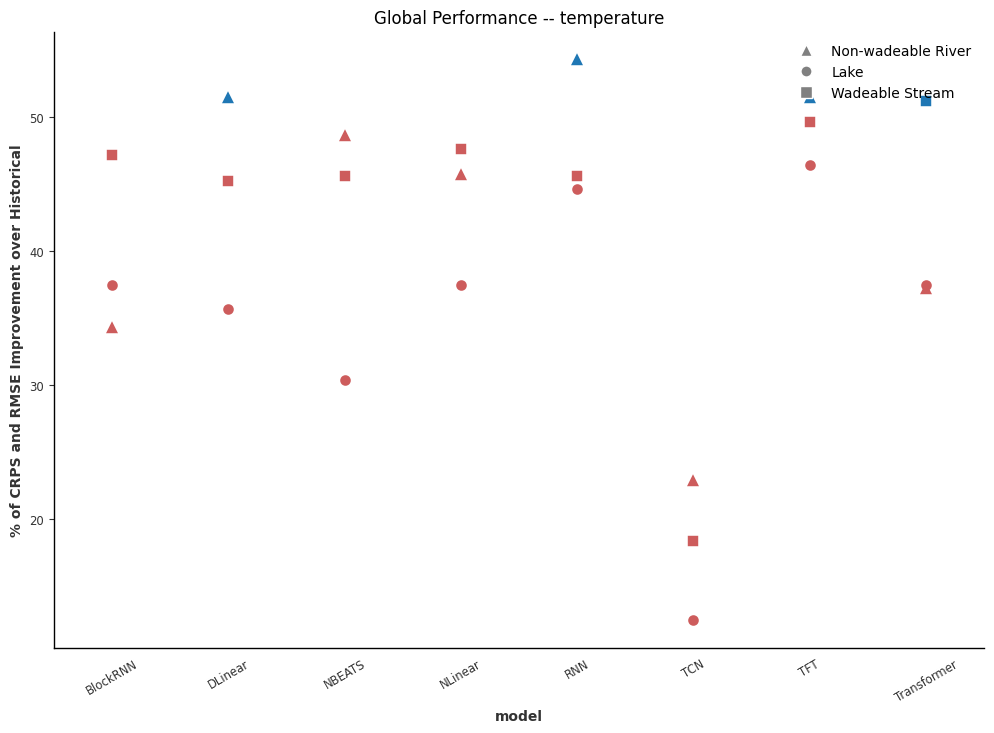

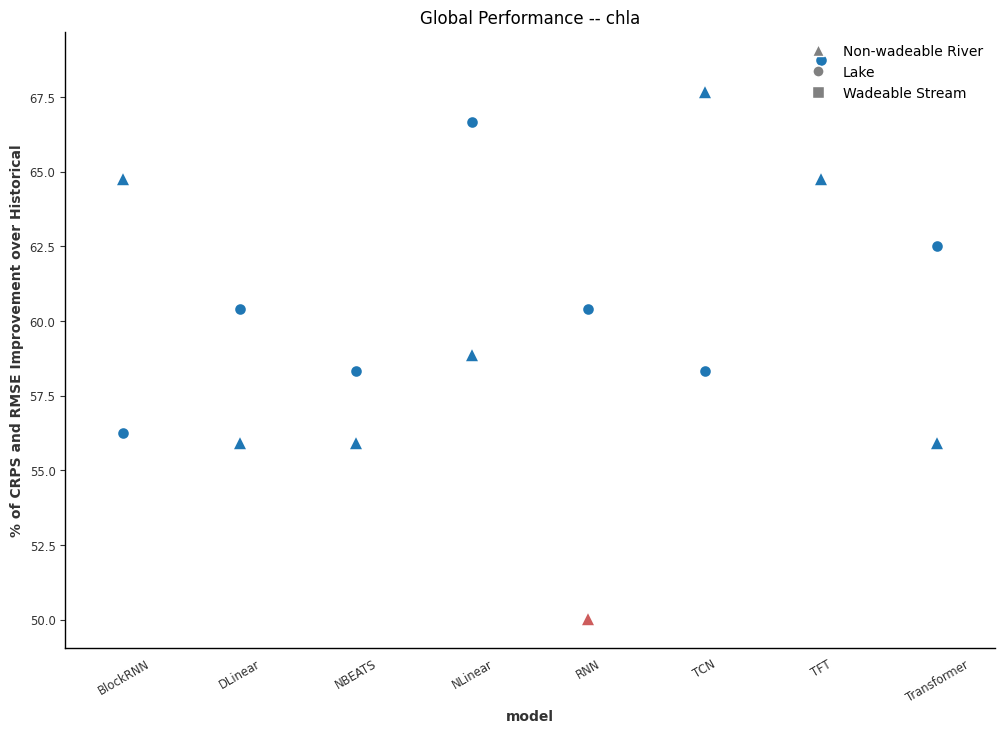

In [10]:
for target_variable in target_variables:
    plot_site_type_percentages_bymodel(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}')

#### Naive Comparison

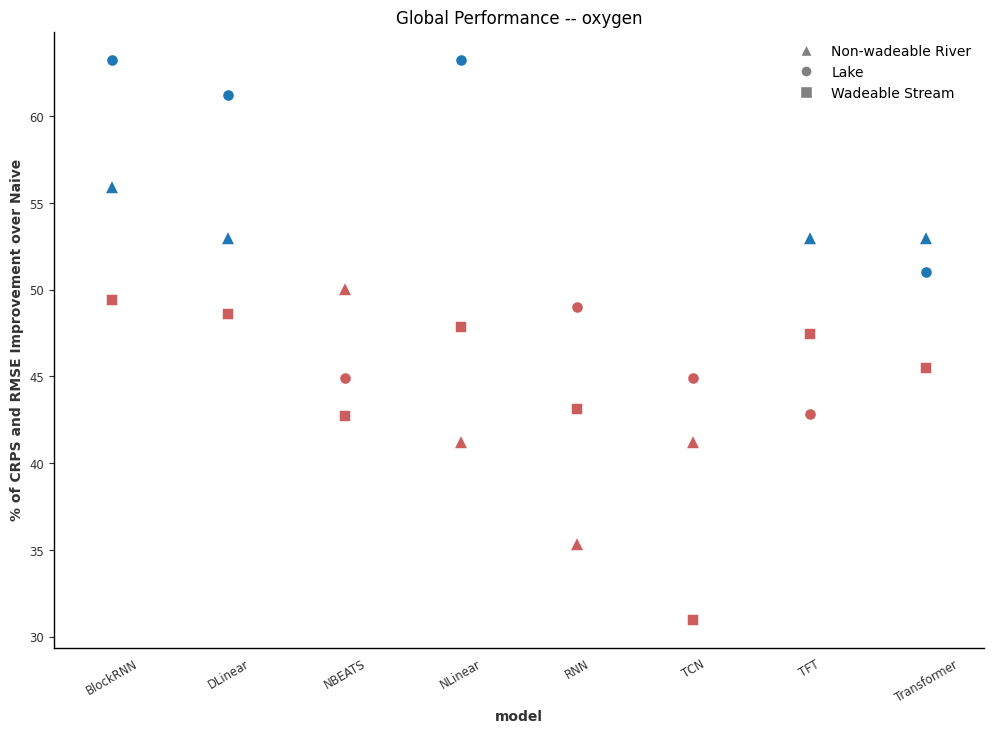

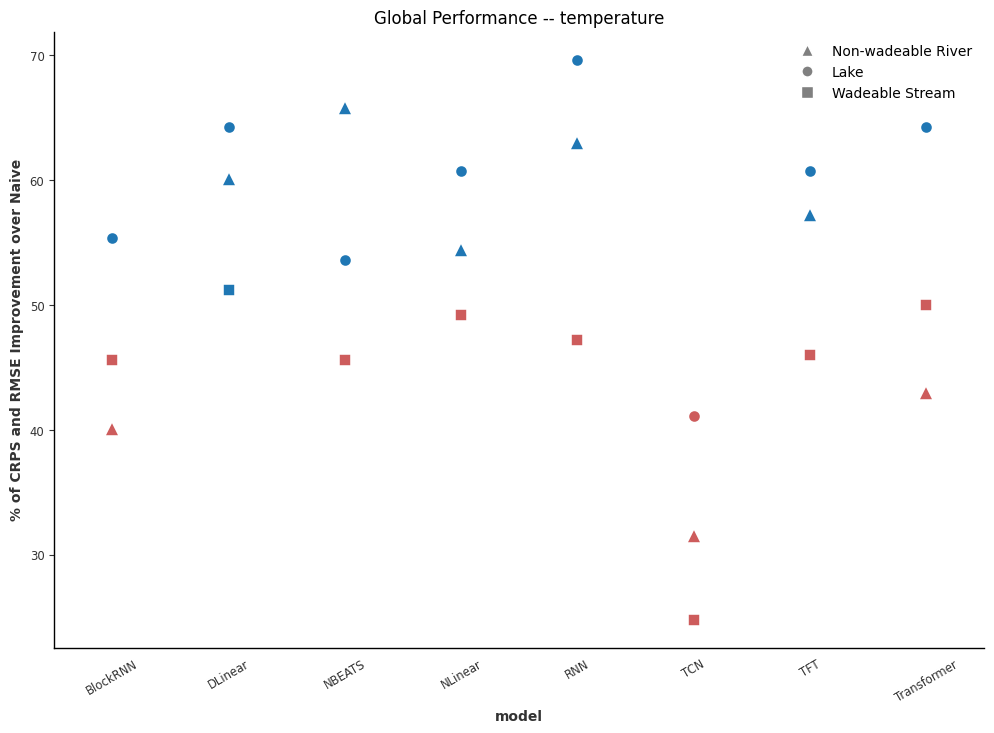

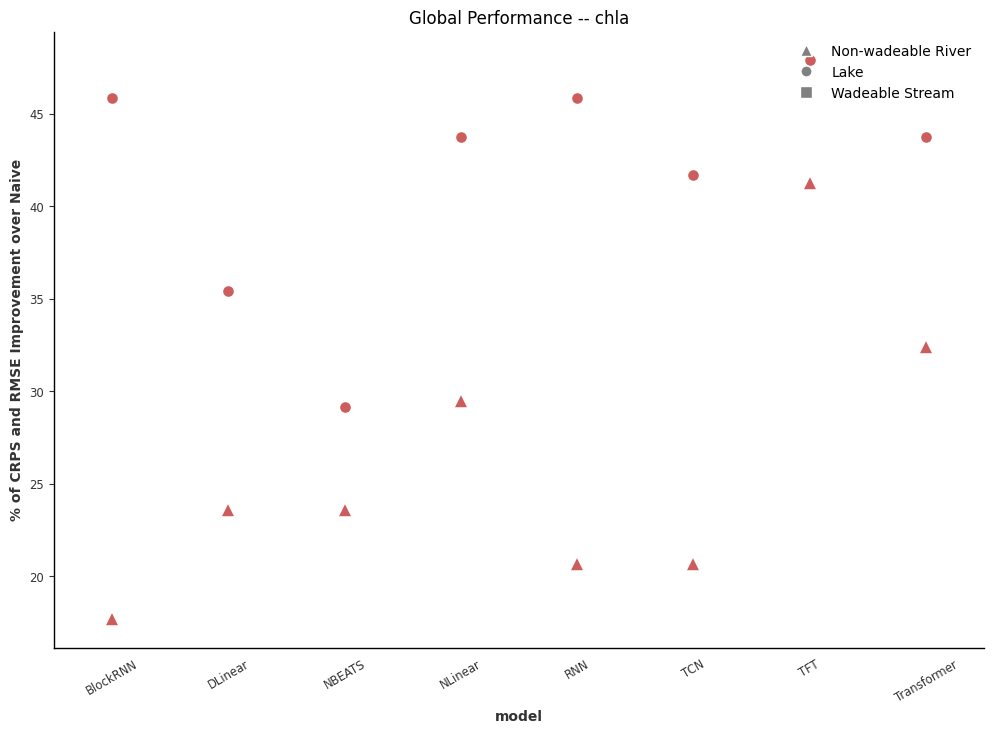

In [11]:
for target_variable in target_variables:
    plot_site_type_percentages_bymodel(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}', historical=False)

### Global Performance over the year

#### Historical Comparison

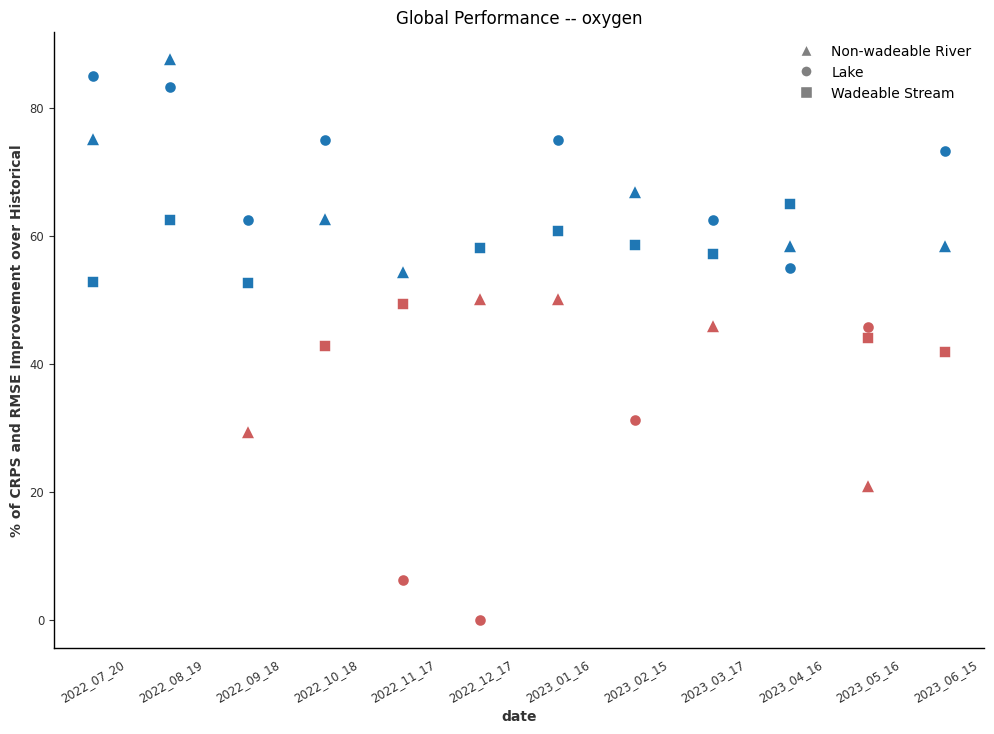

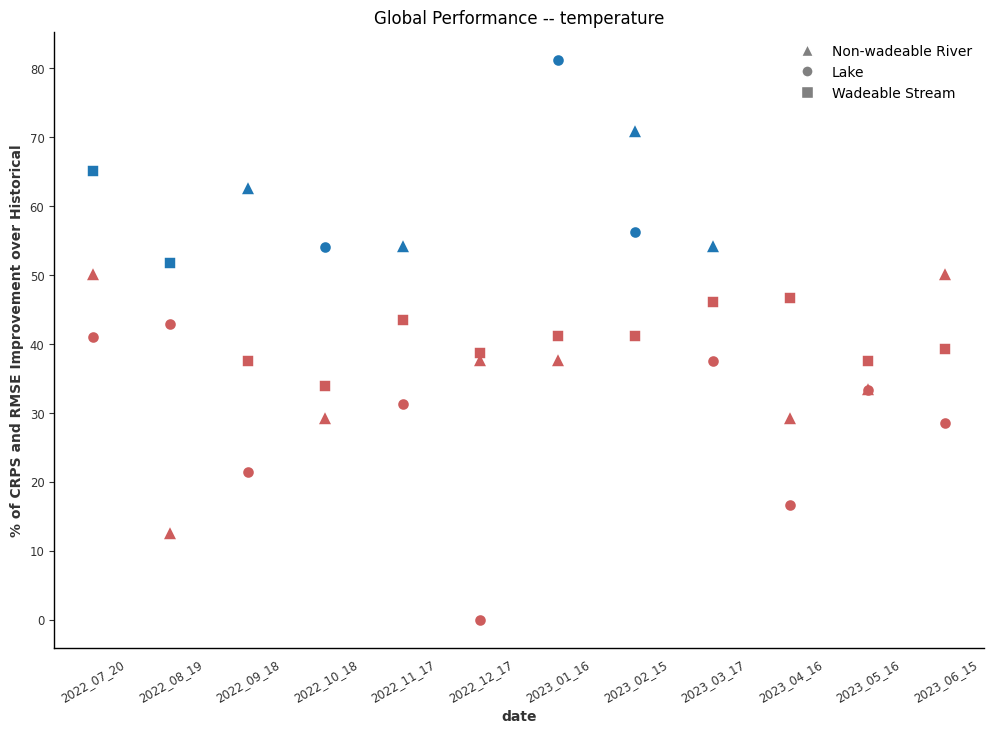

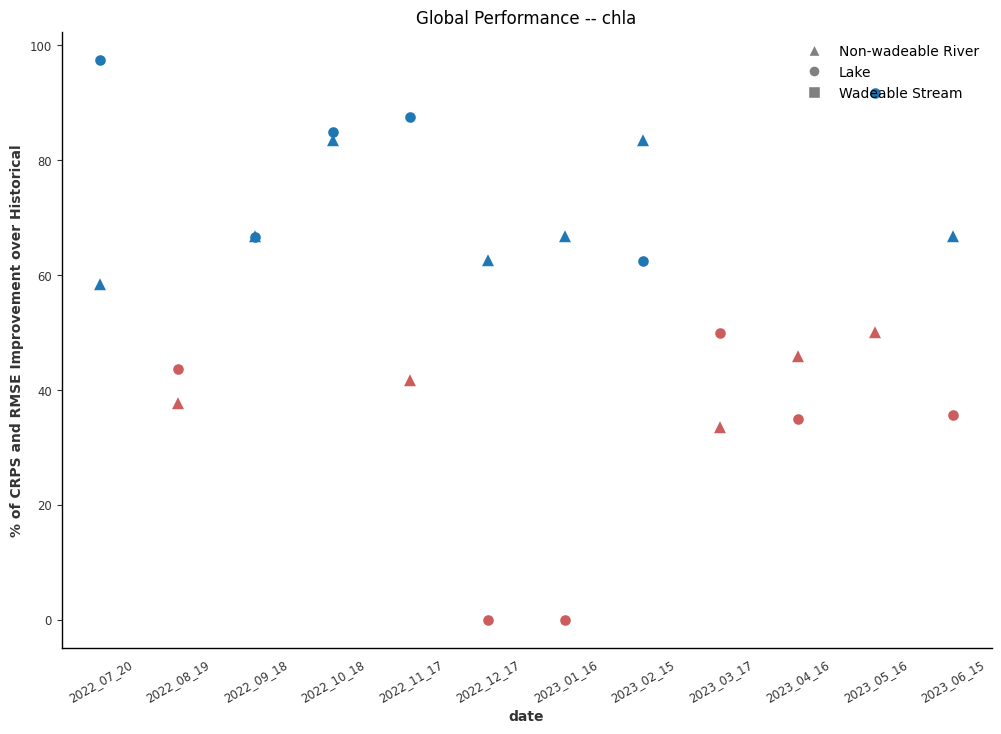

In [12]:
for target_variable in target_variables:
    plot_window_and_sitetype_performance(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}')

#### Naive Comparison

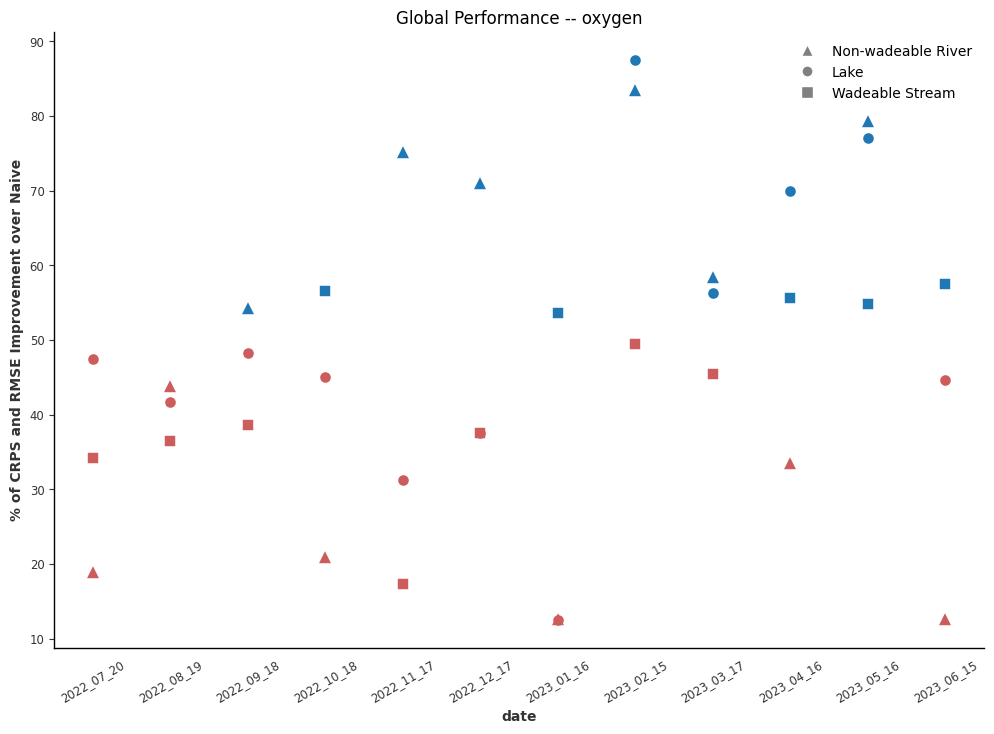

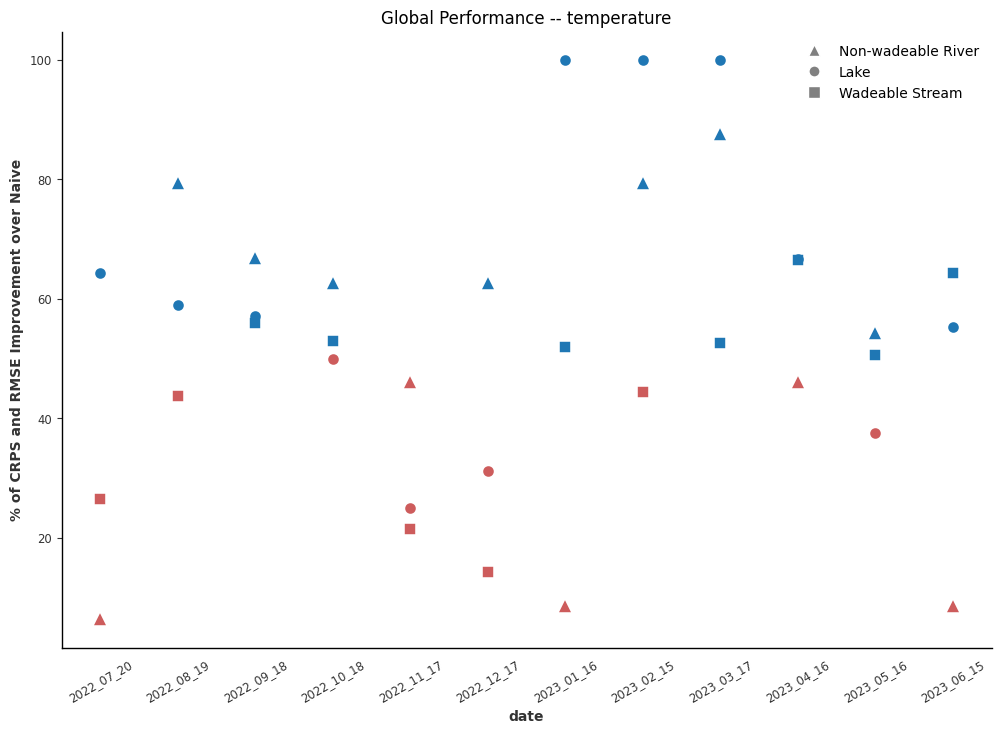

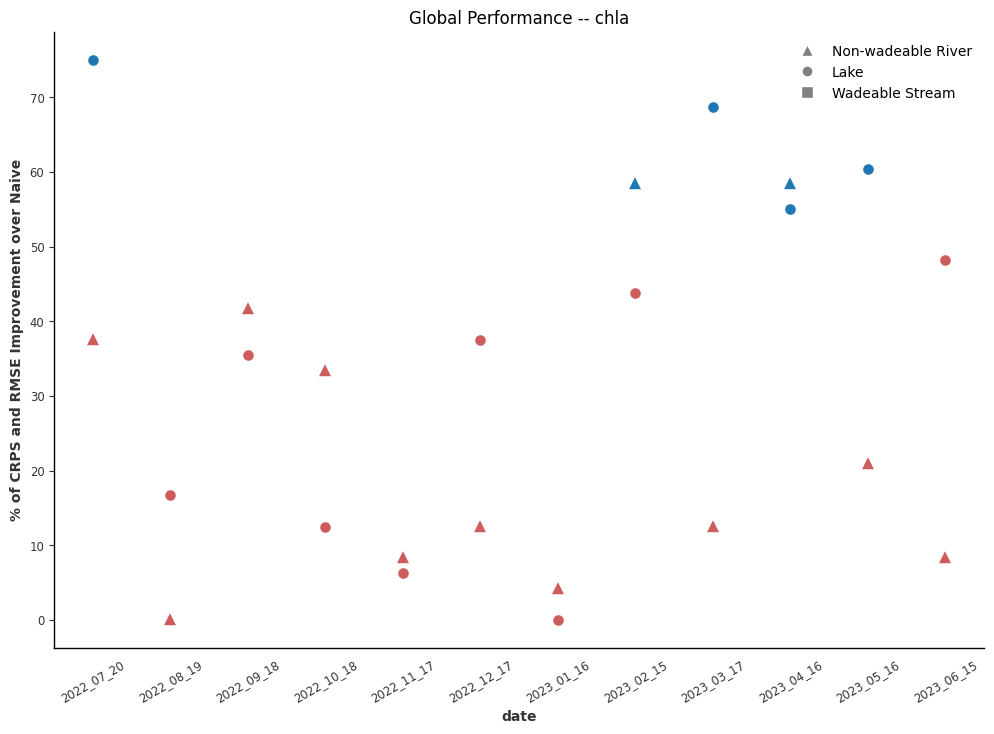

In [13]:
for target_variable in target_variables:
    plot_window_and_sitetype_performance(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}', historical=False)

### Global Performance by Geographical Cluster

#### Historical Comparison

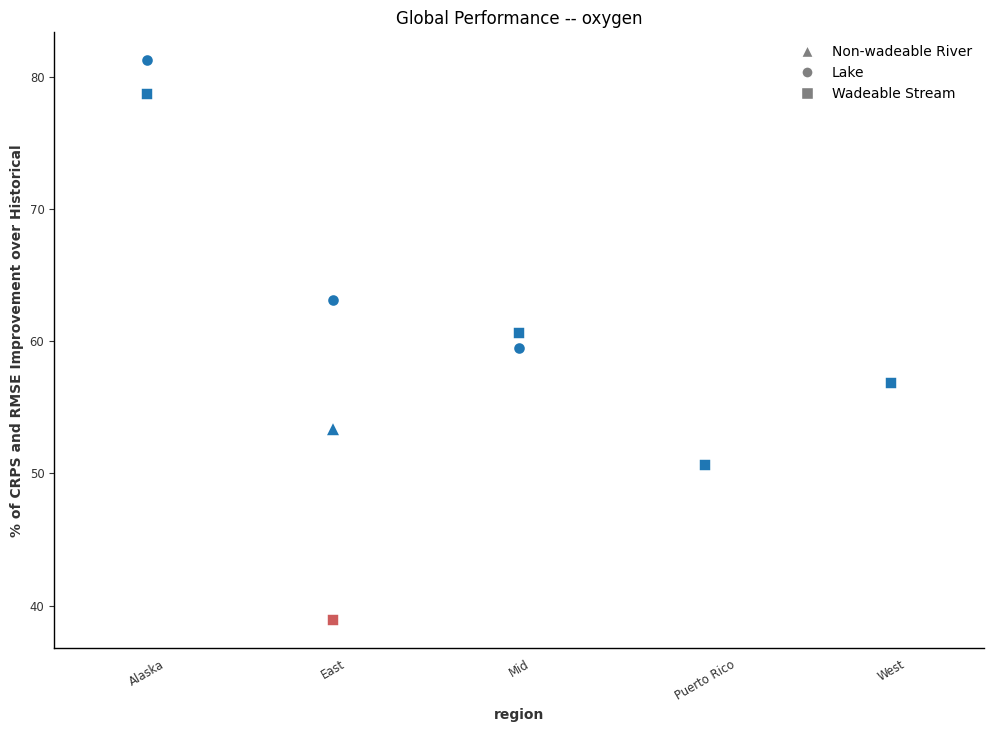

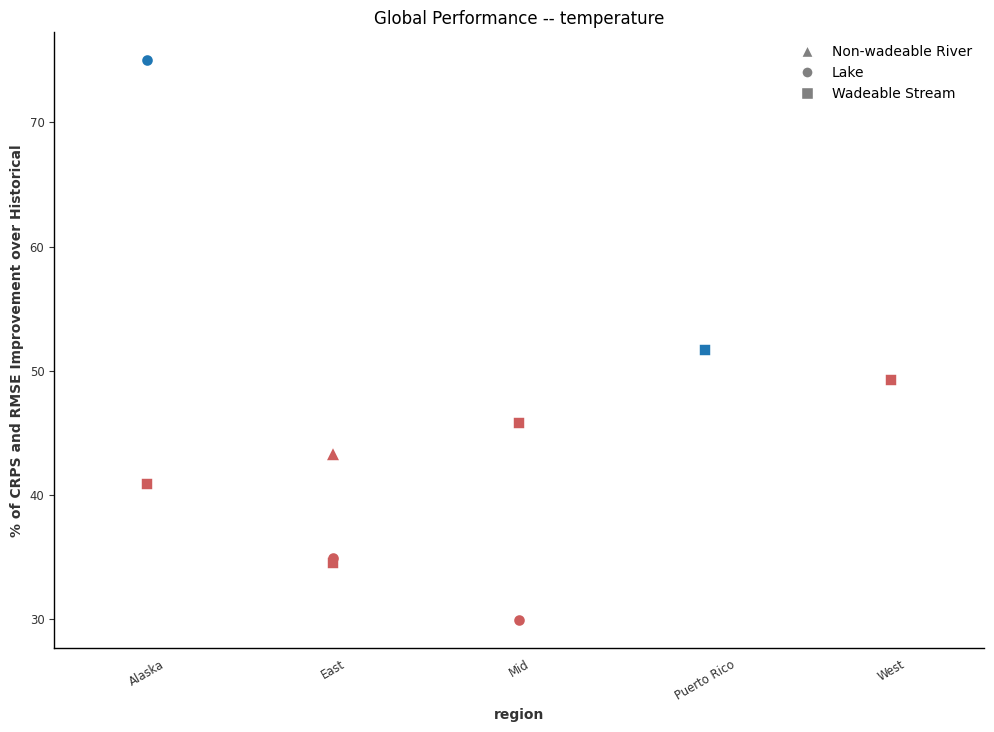

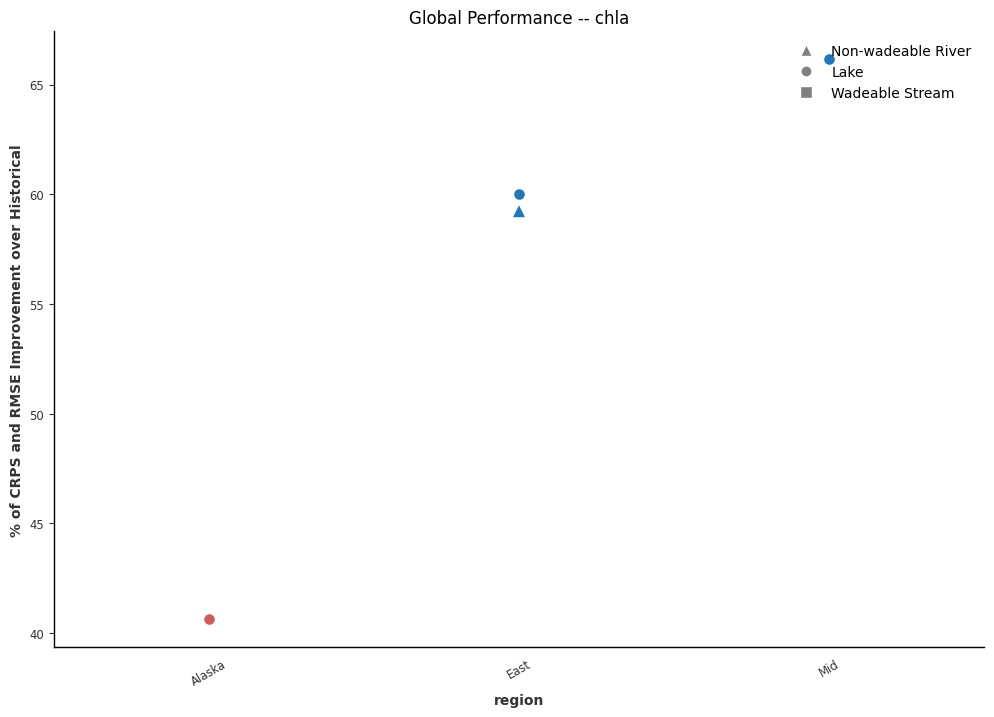

In [15]:
for target_variable in target_variables:
    plot_region_percentages(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}')

#### Naive Comparison

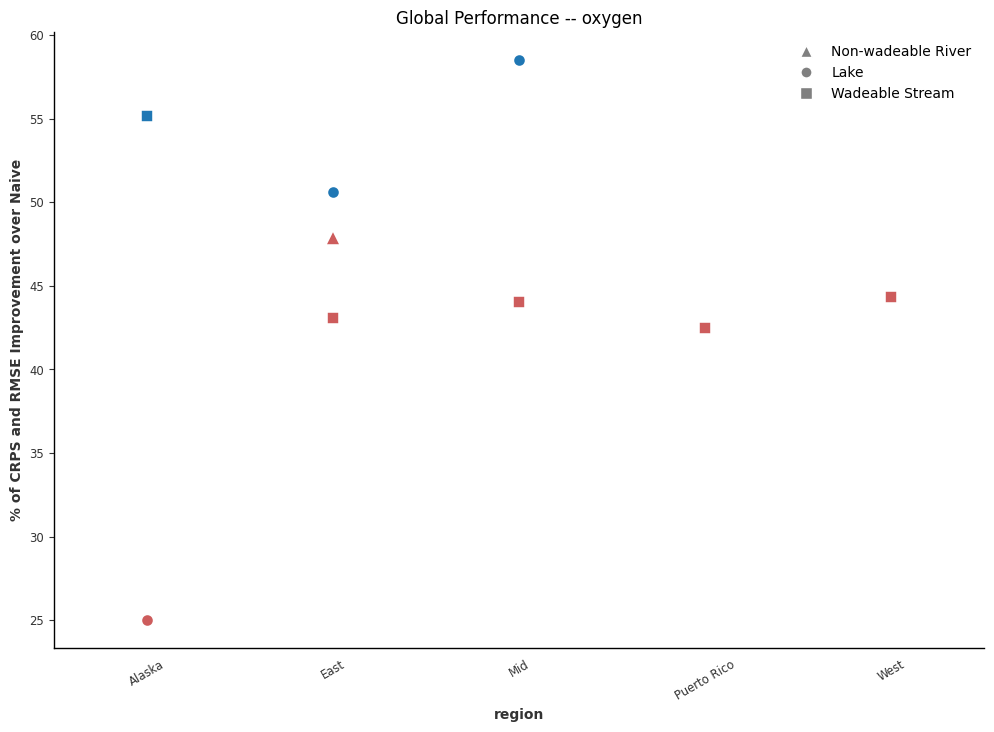

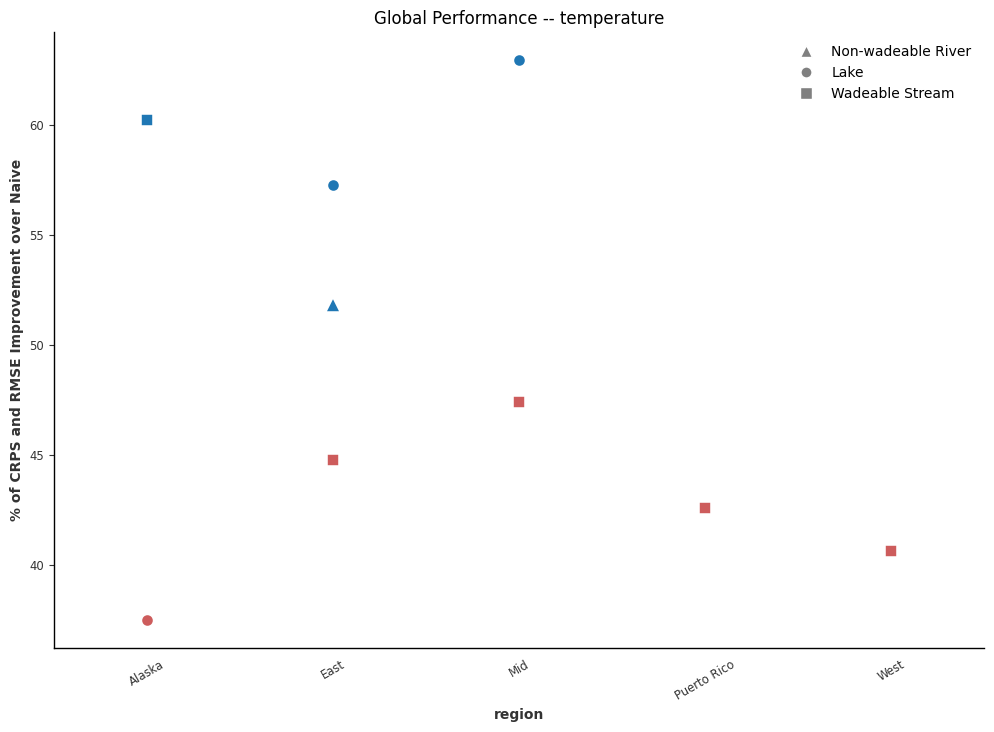

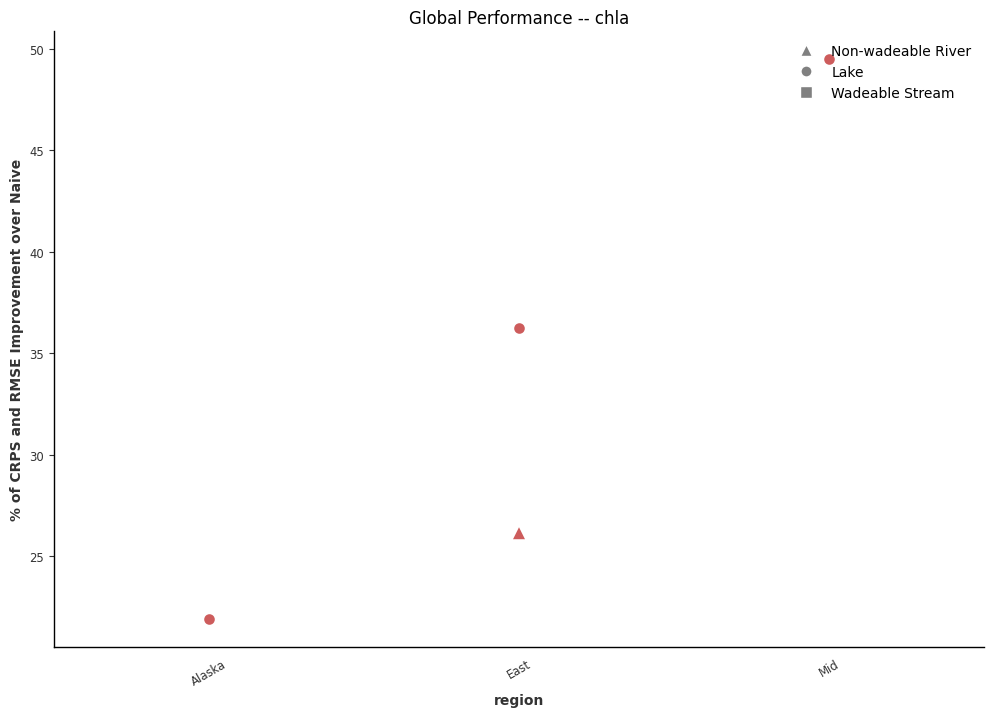

In [16]:
for target_variable in target_variables:
    plot_region_percentages(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}', historical=False)

### Model Performance by Site

#### Historical Comparison

##### Oxygen

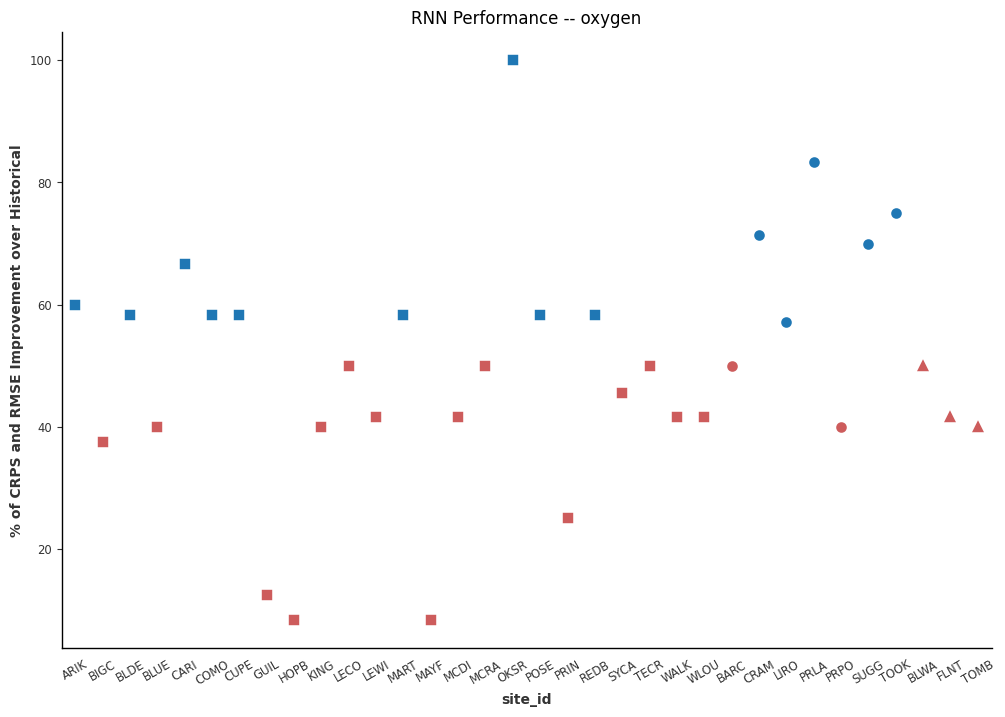

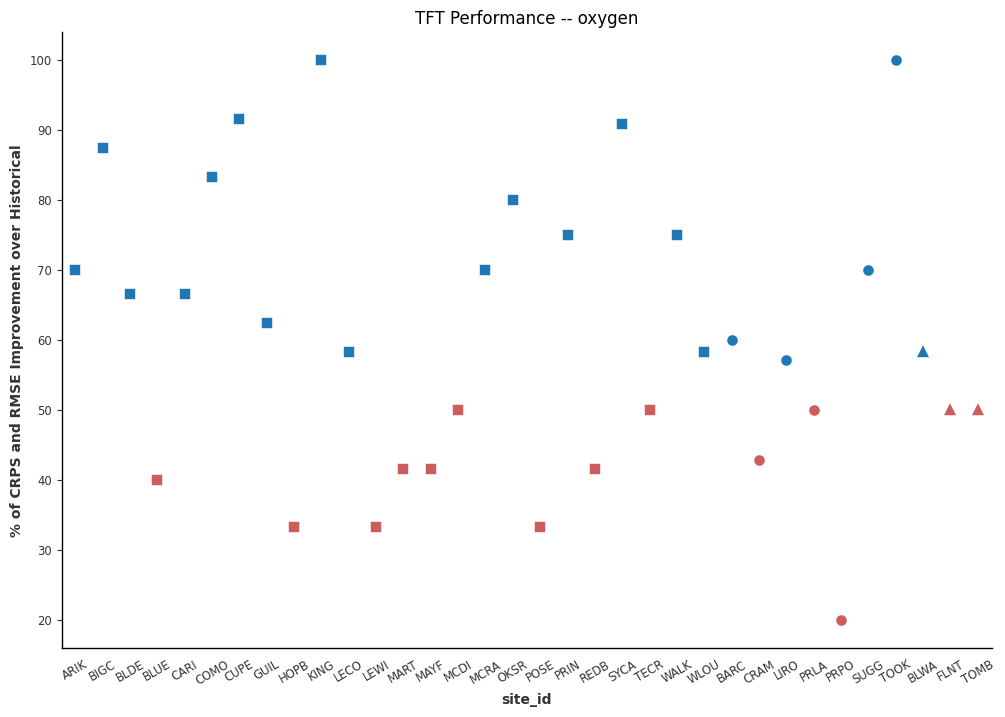

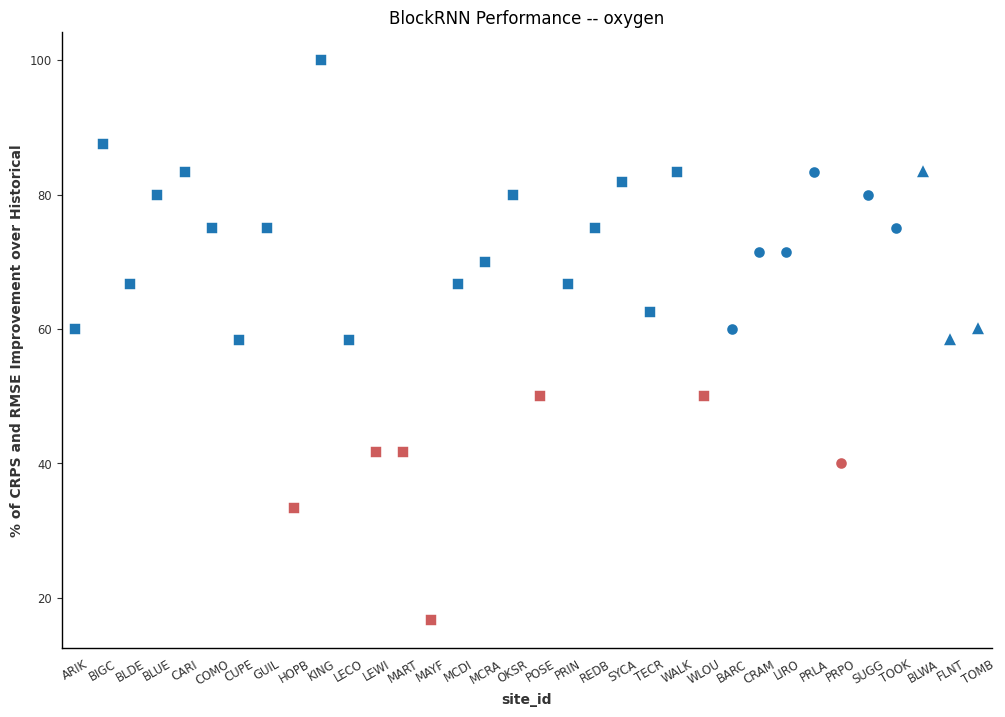

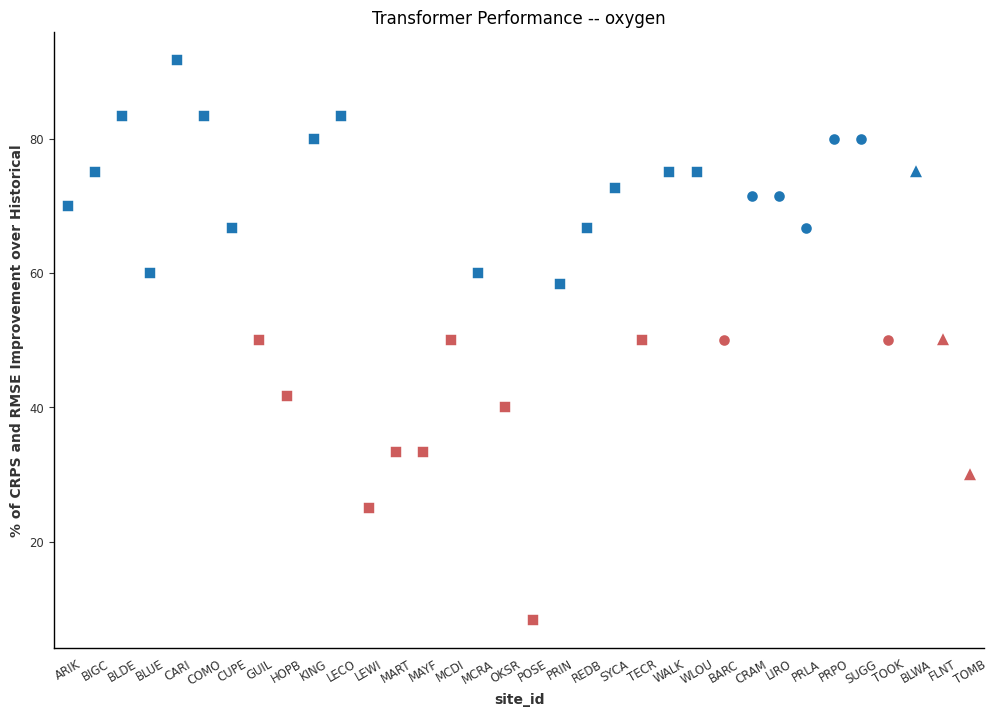

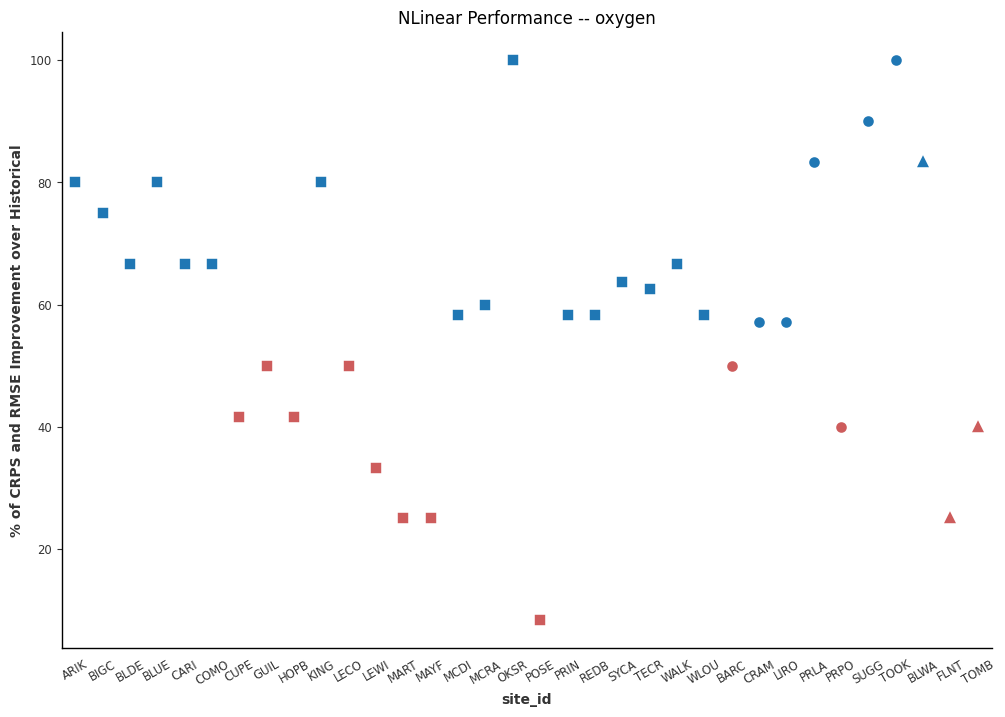

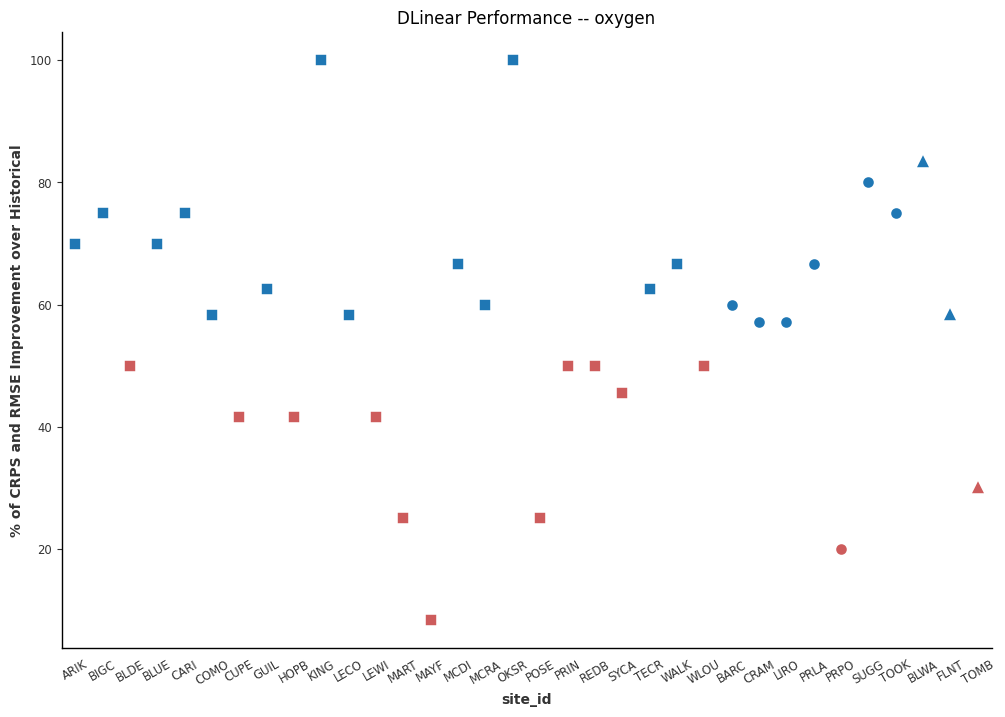

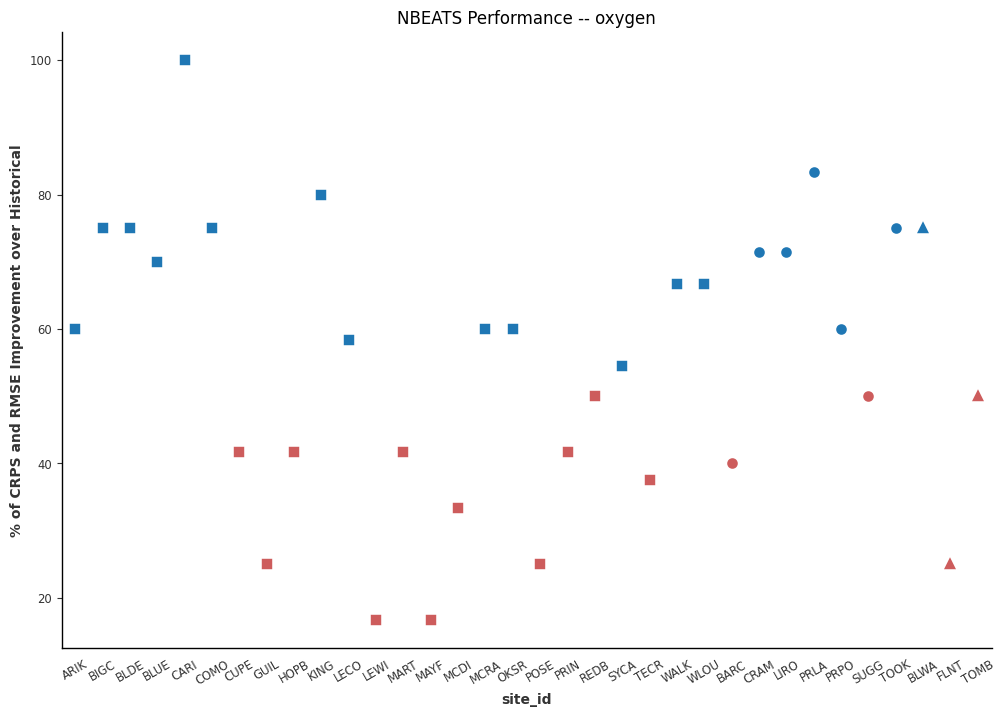

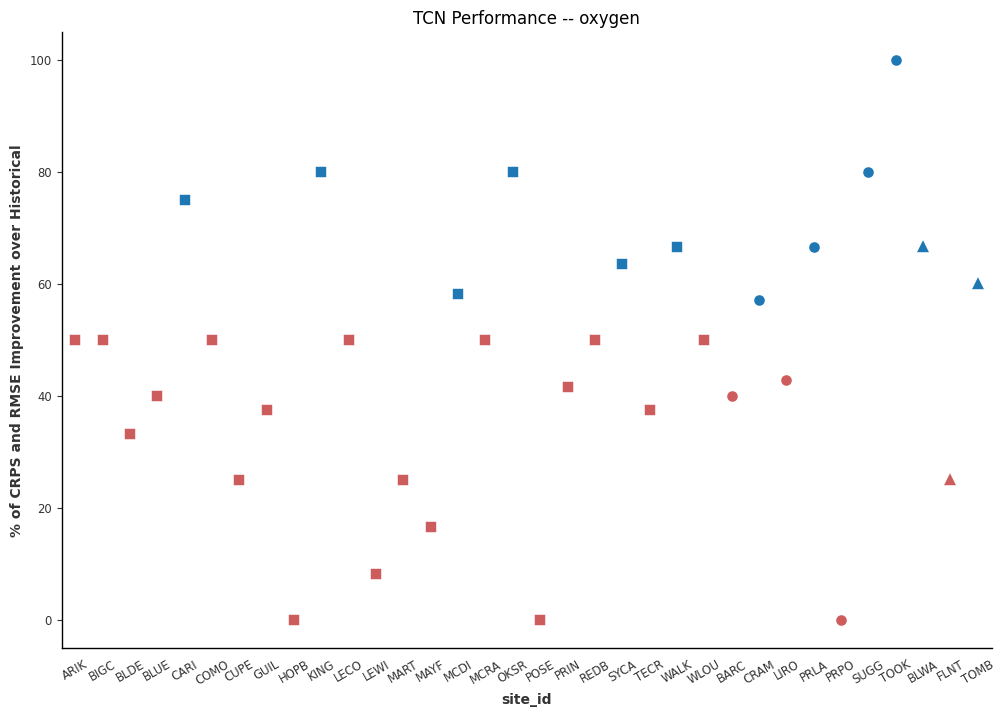

In [17]:
variable = 'oxygen'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable], metadata, f'{model} Performance -- {variable}')

##### Temperature

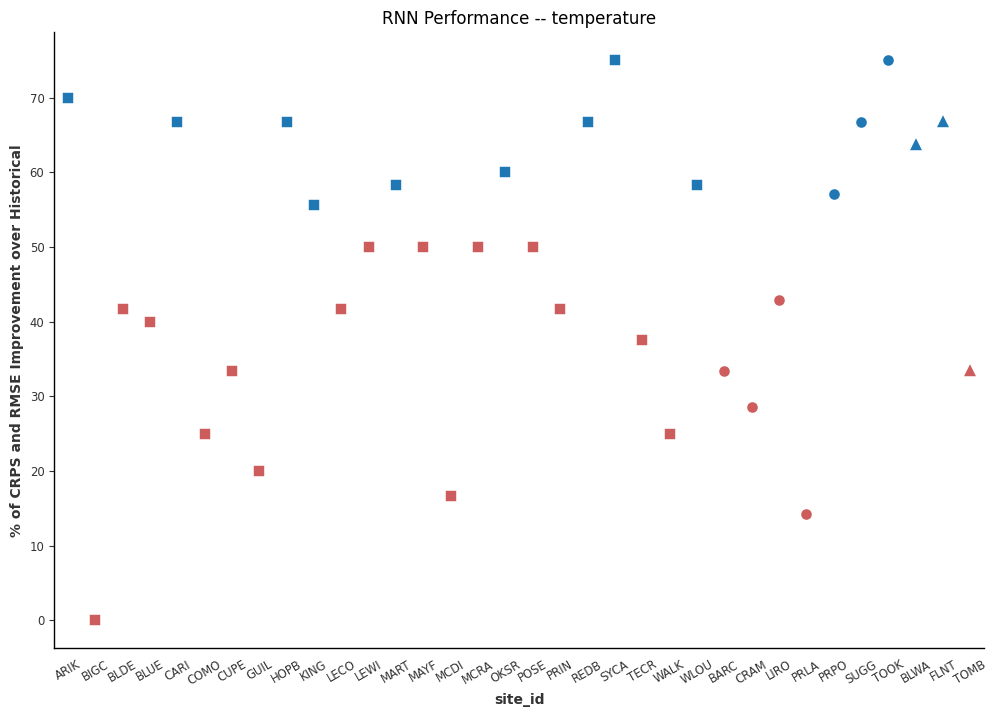

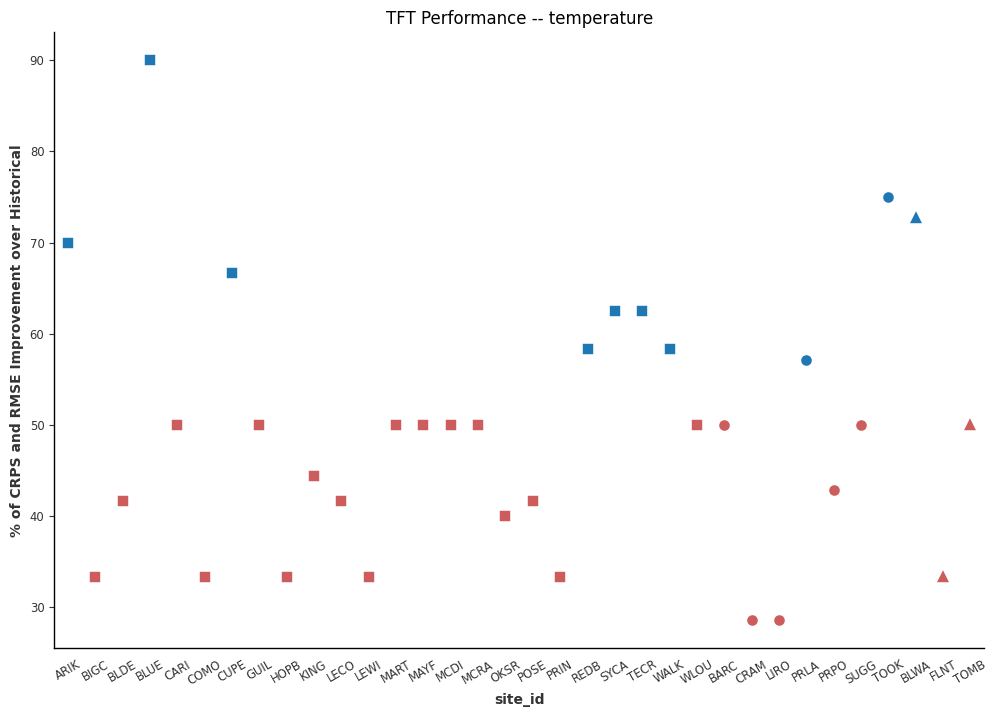

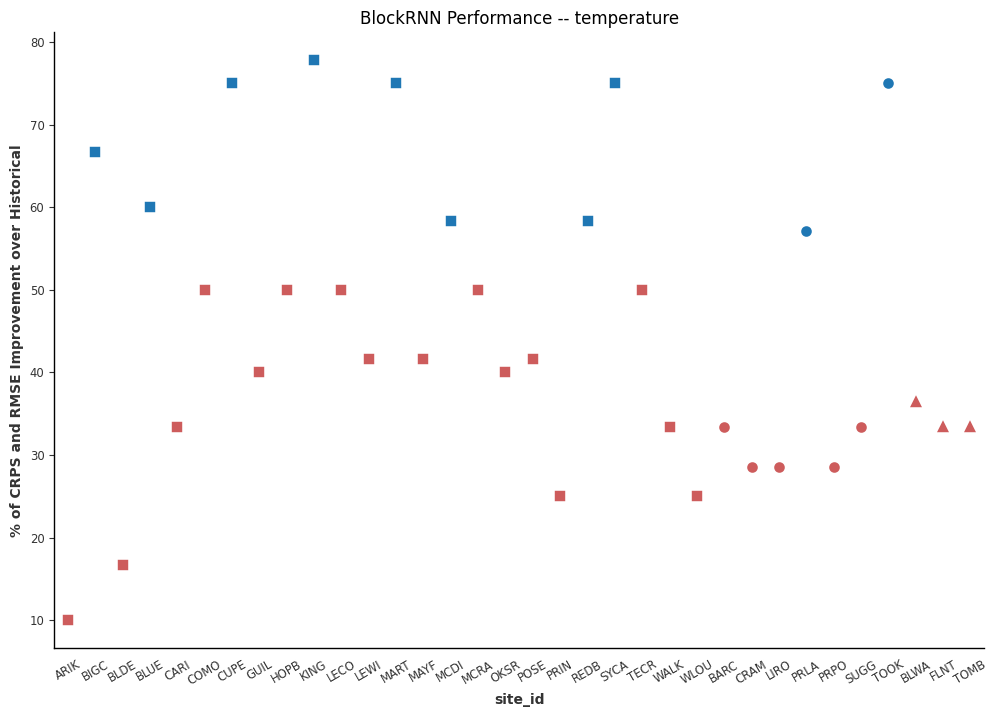

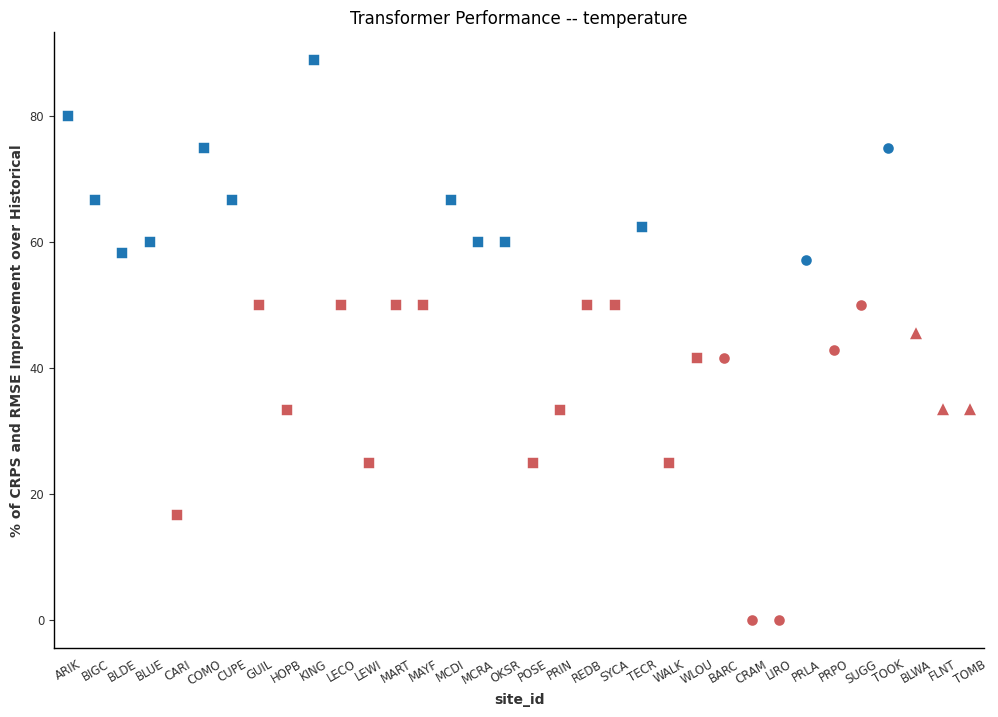

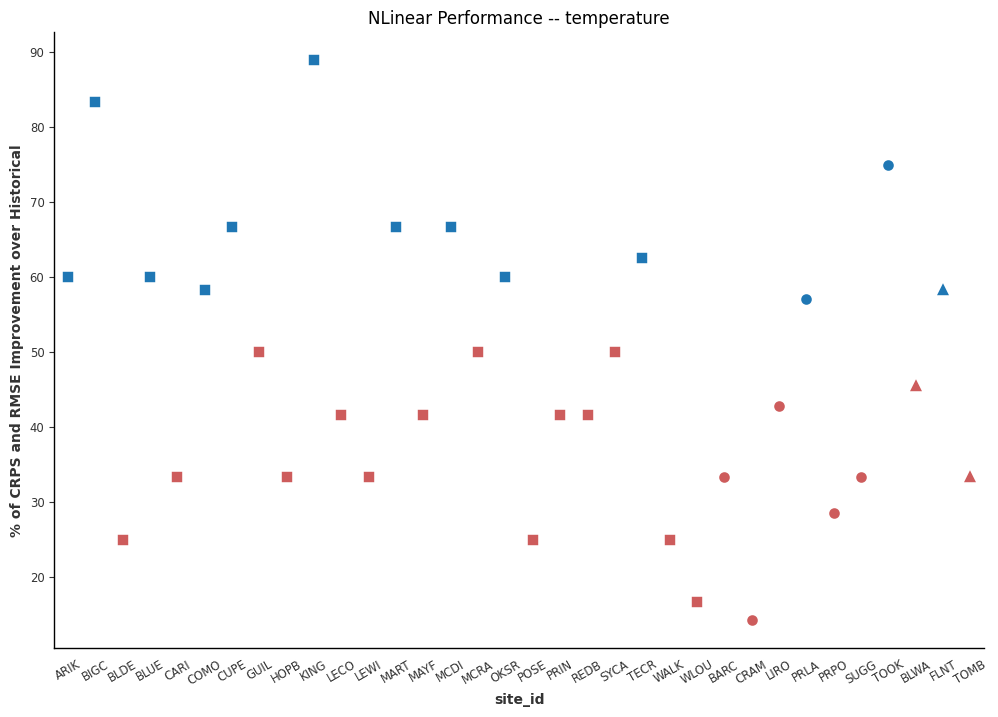

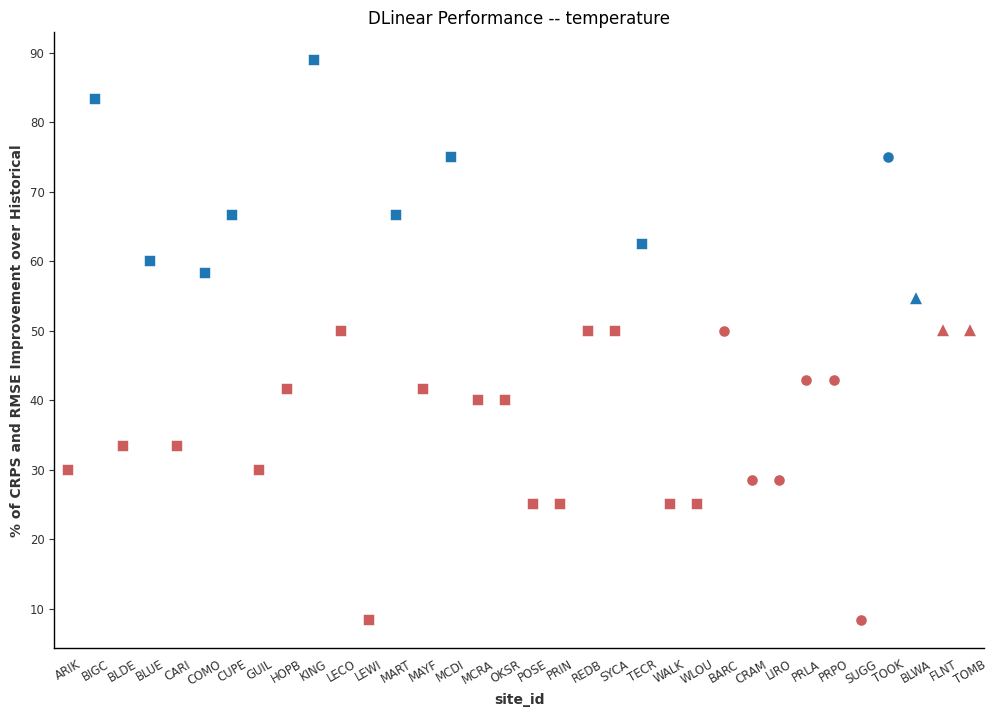

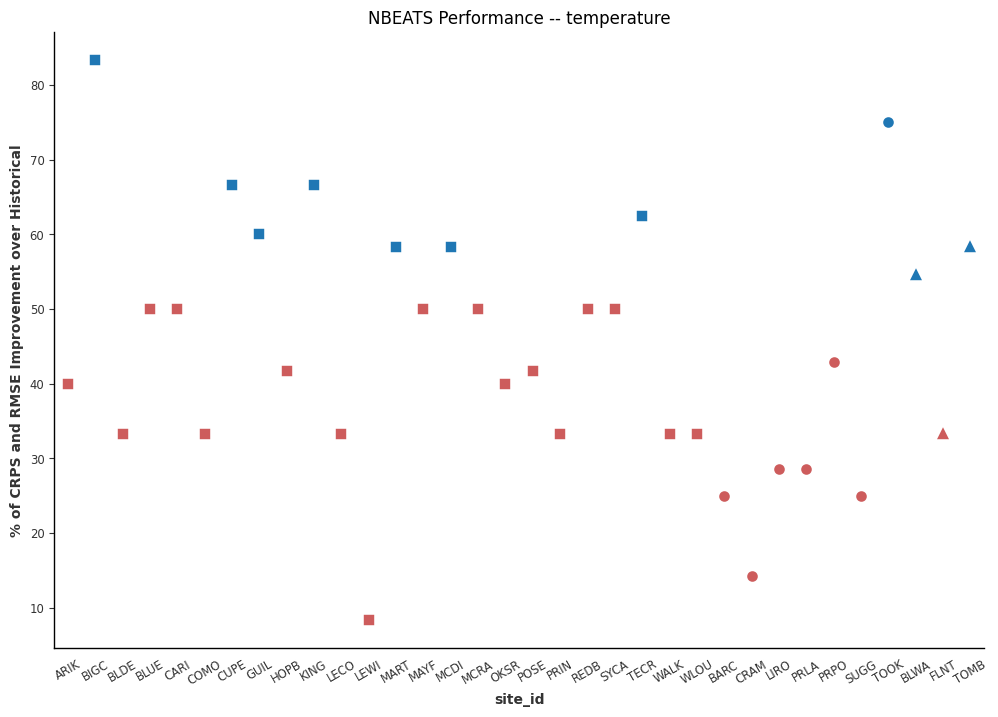

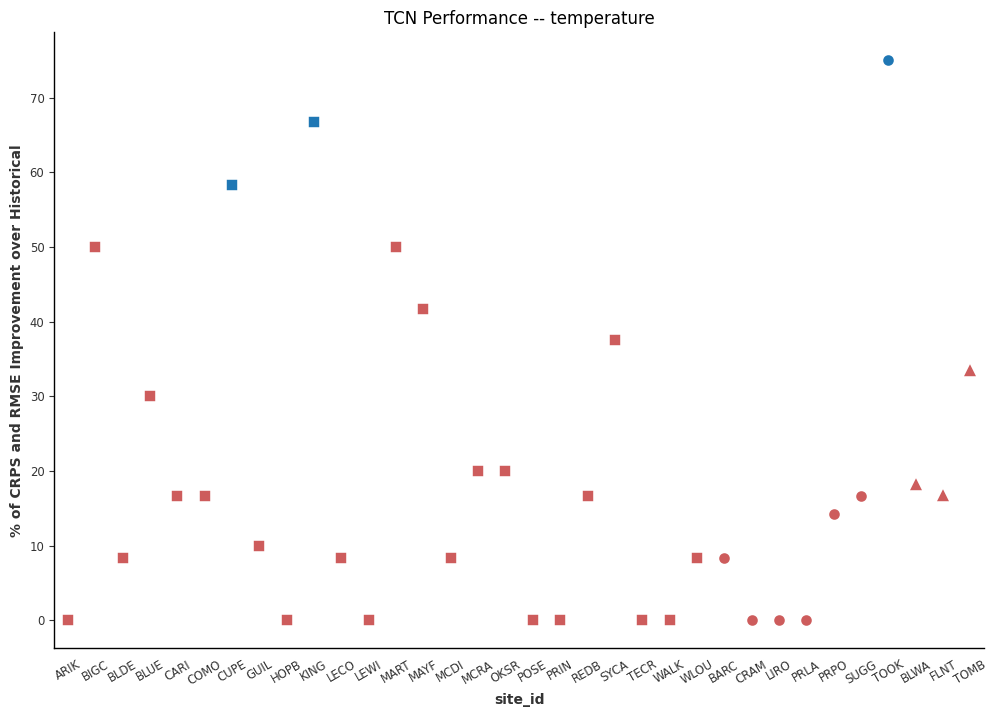

In [18]:
variable = 'temperature'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable], metadata, f'{model} Performance -- {variable}')

##### Chla

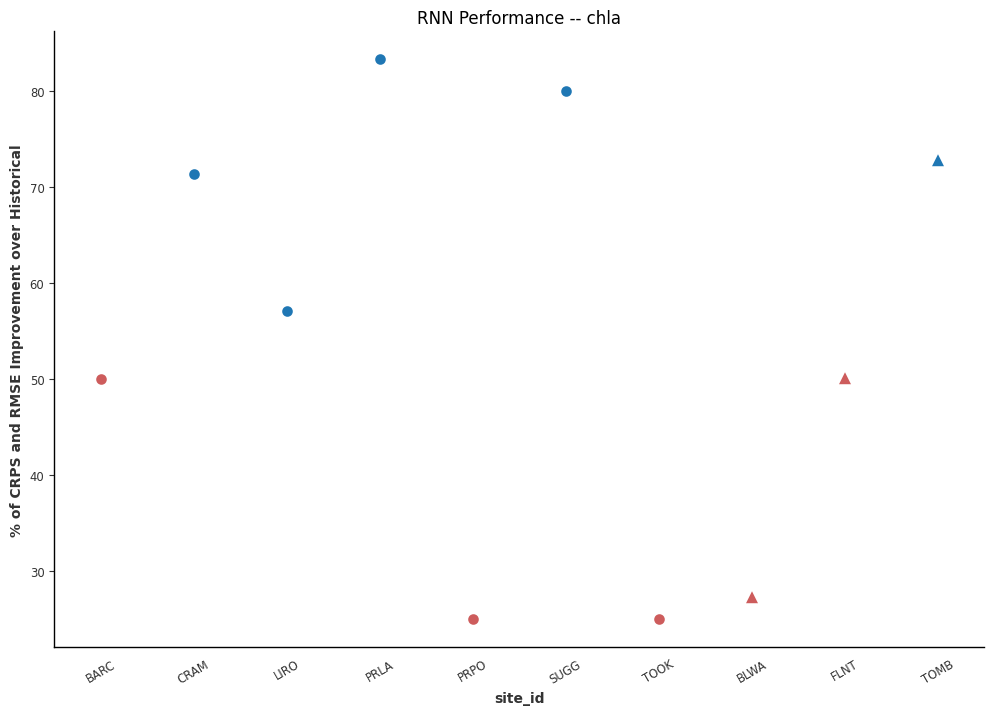

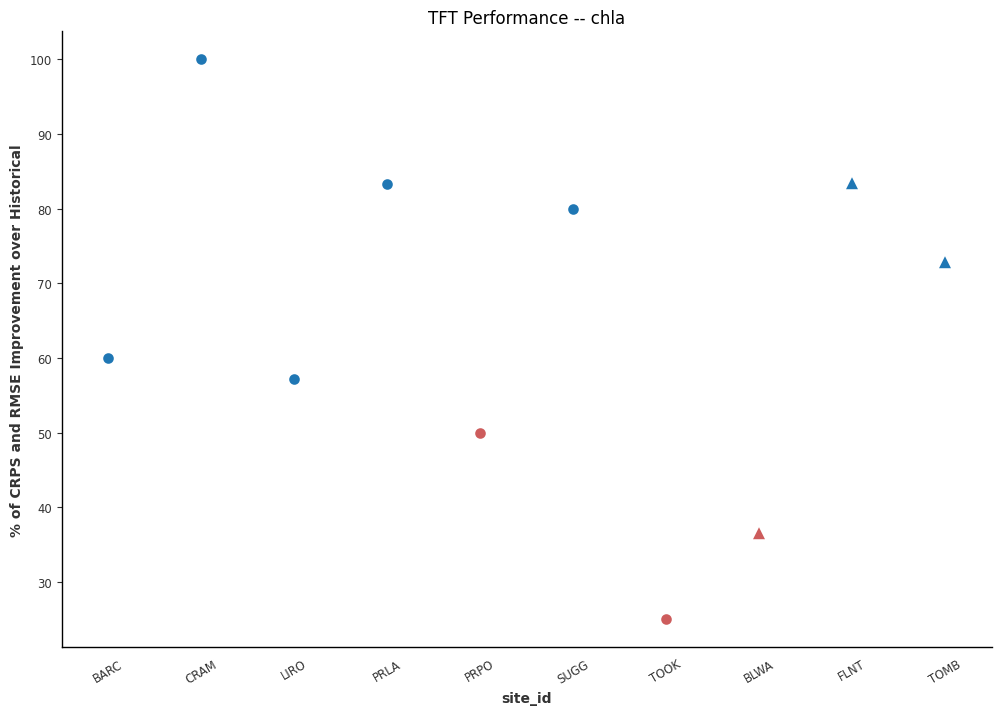

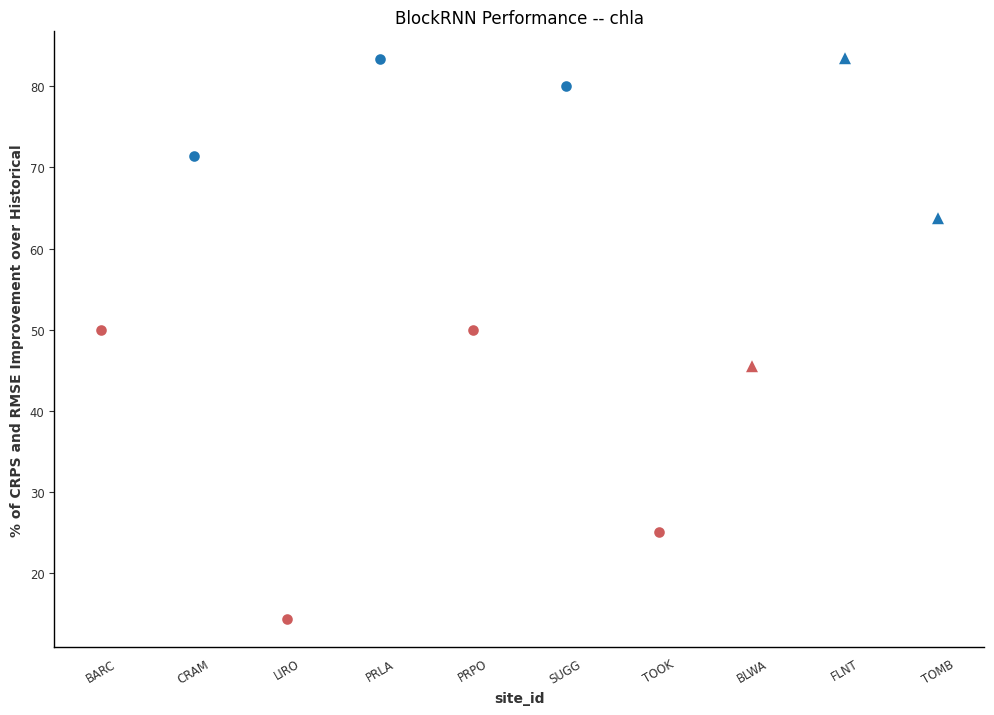

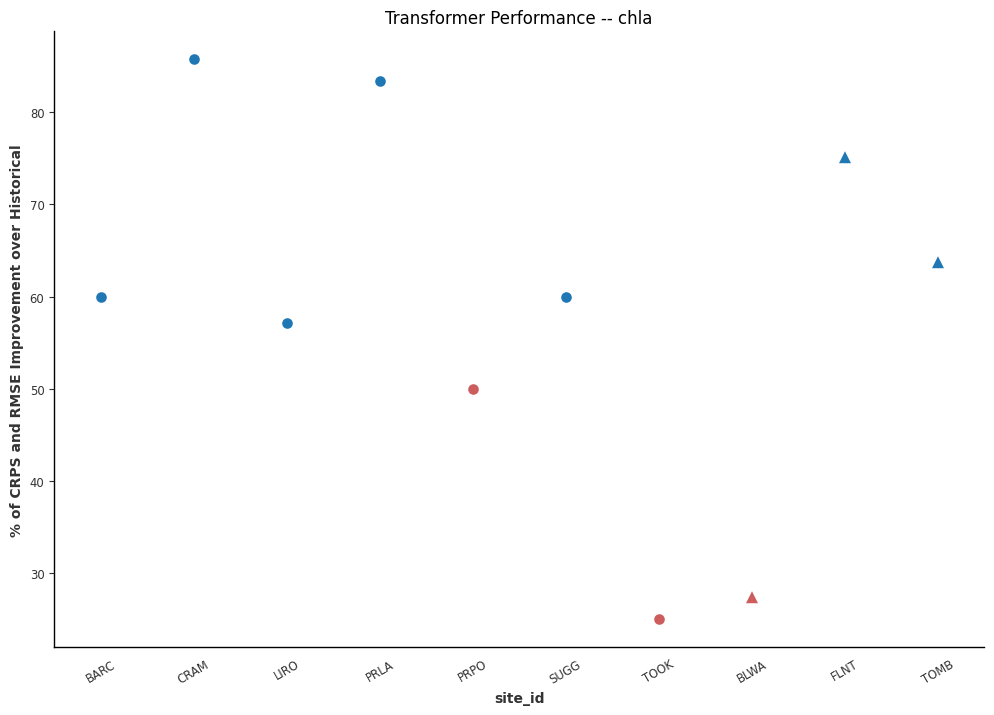

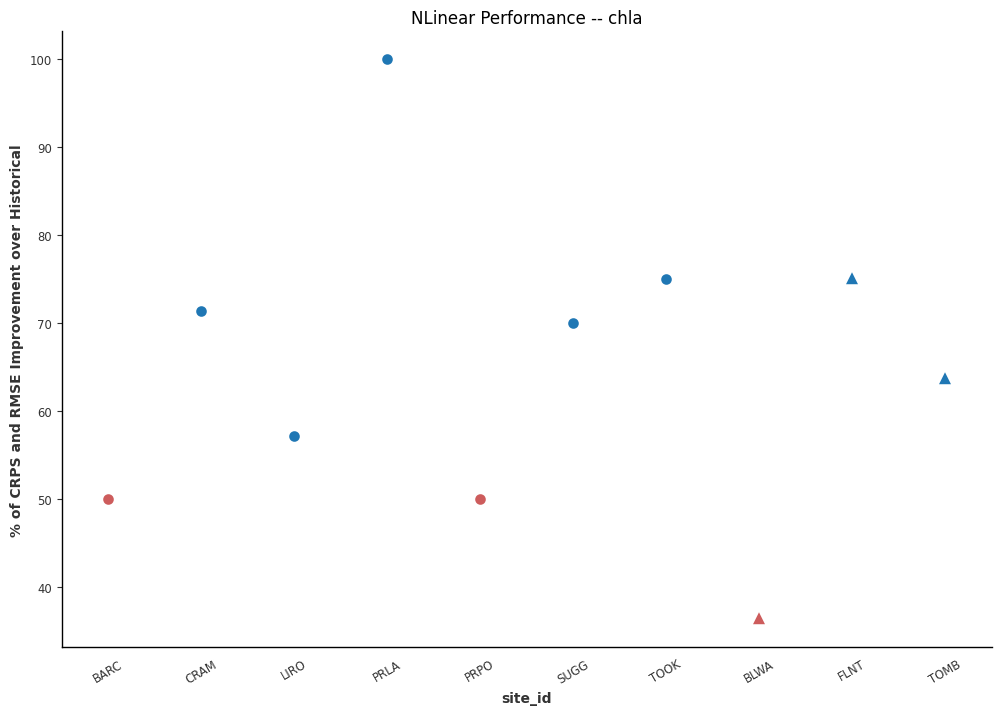

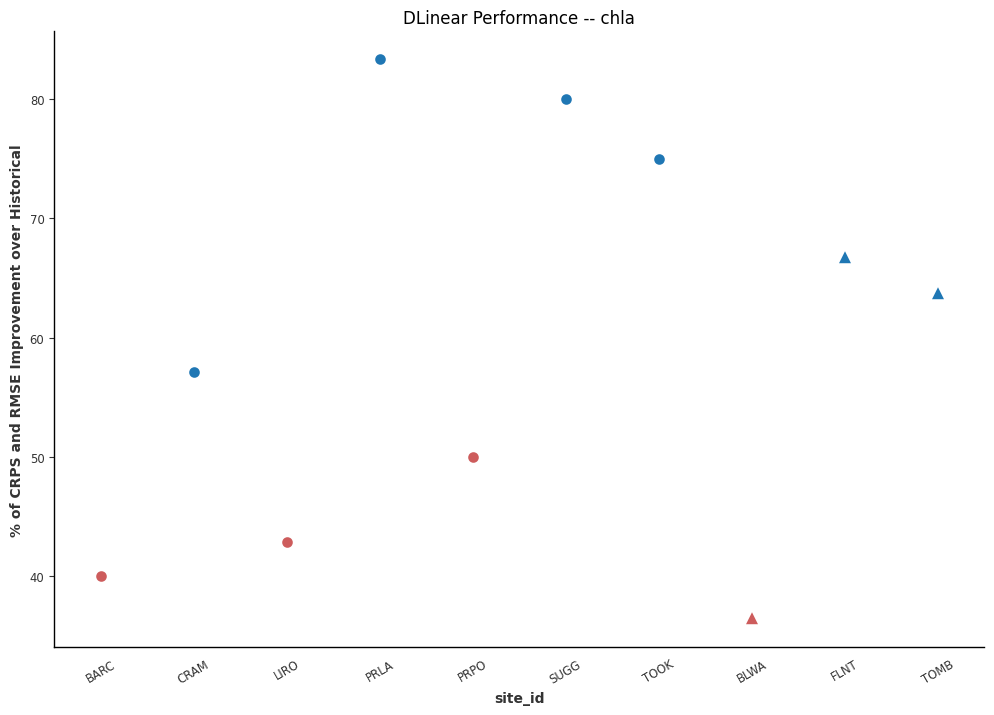

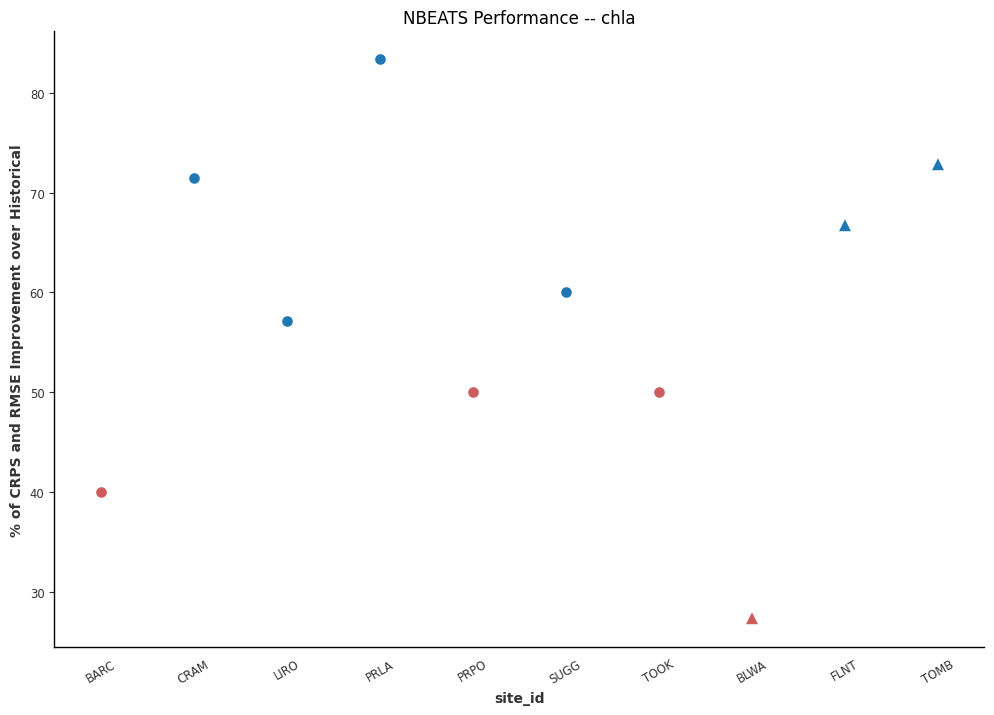

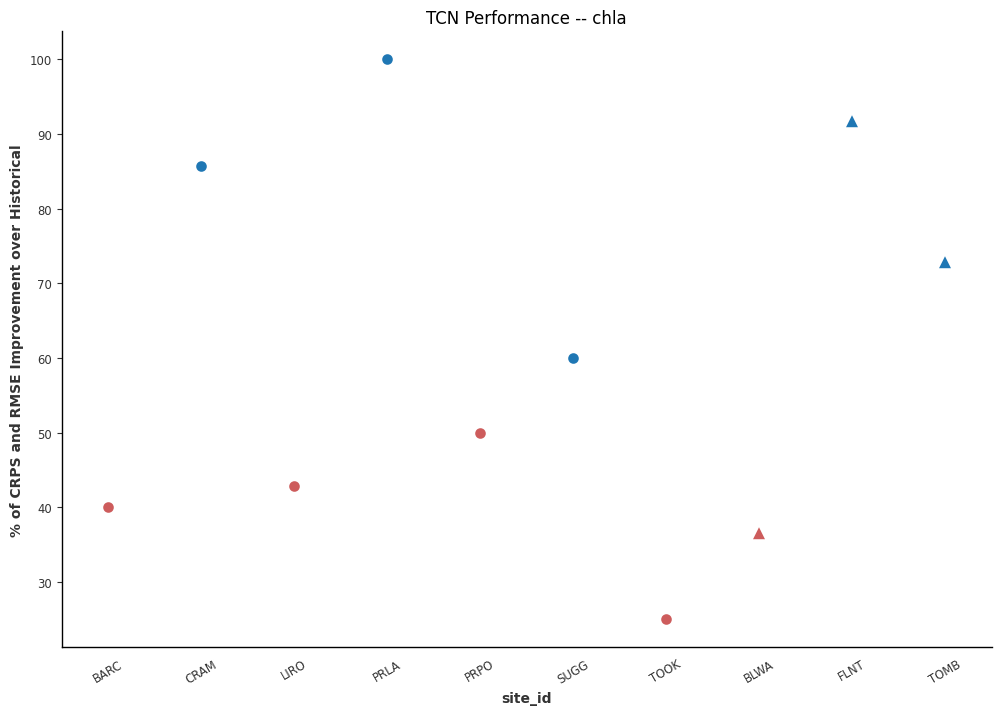

In [19]:
variable = 'chla'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable], metadata, f'{model} Performance -- {variable}')

#### Naive Comparison

##### Oxygen

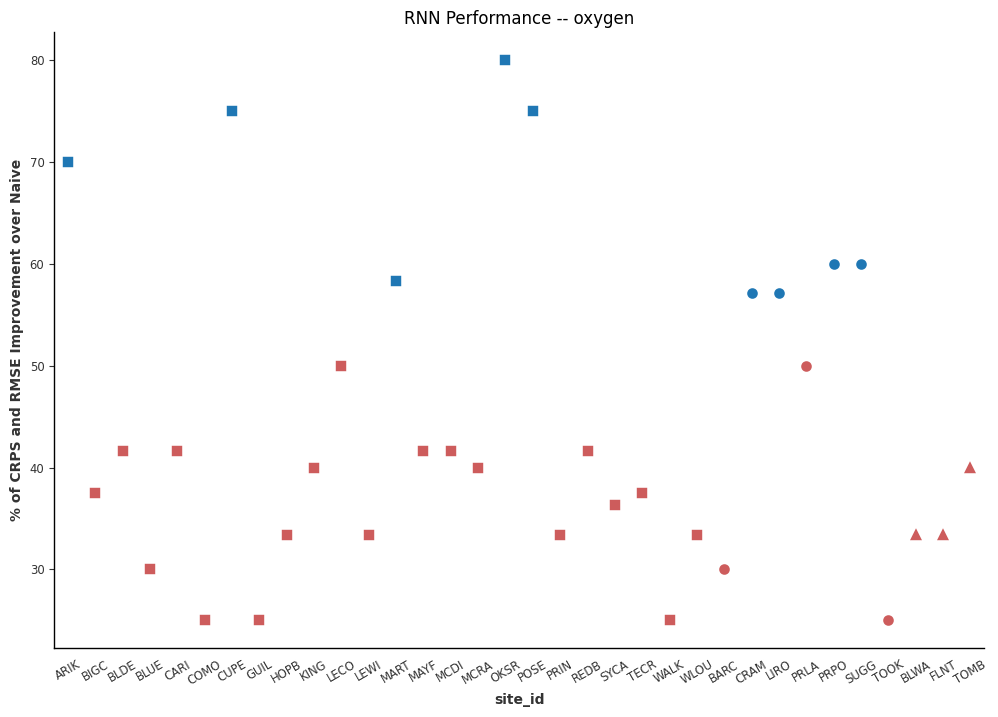

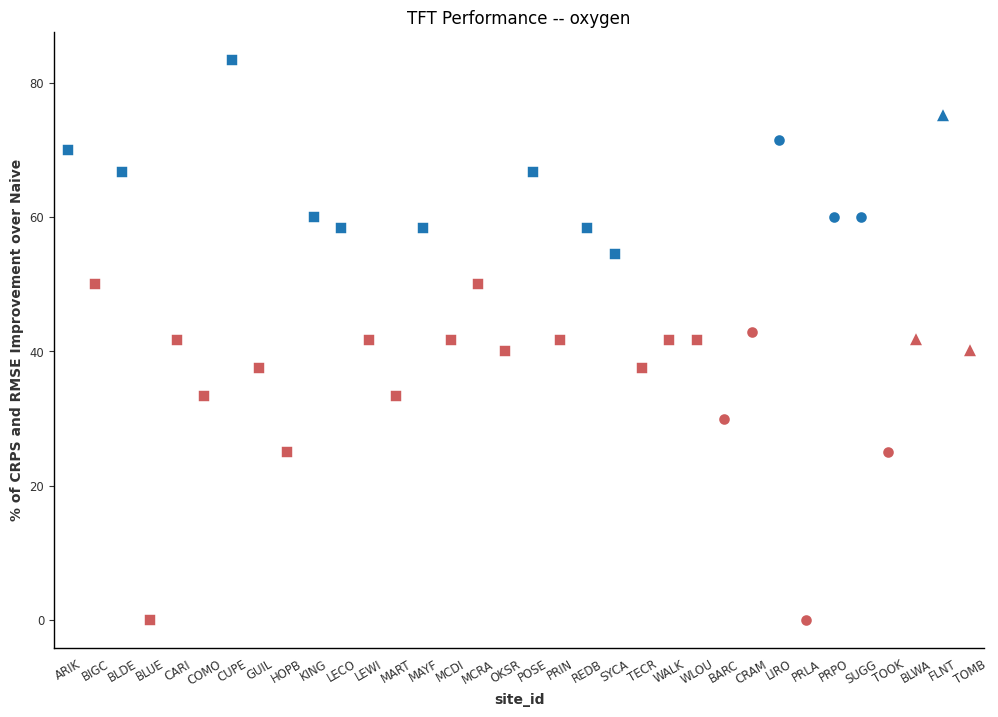

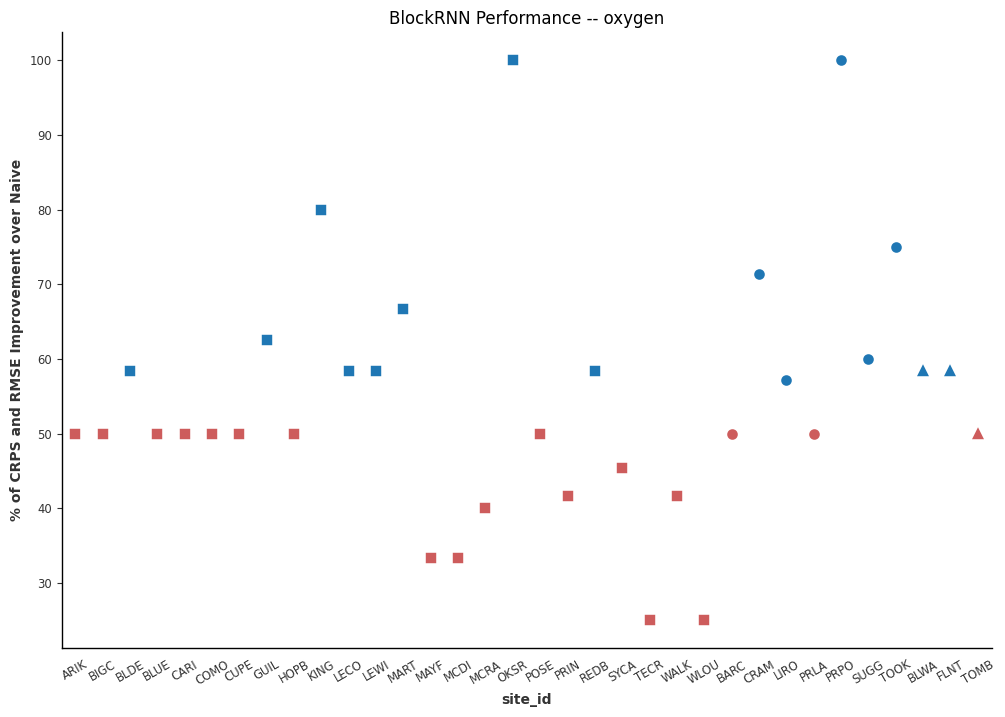

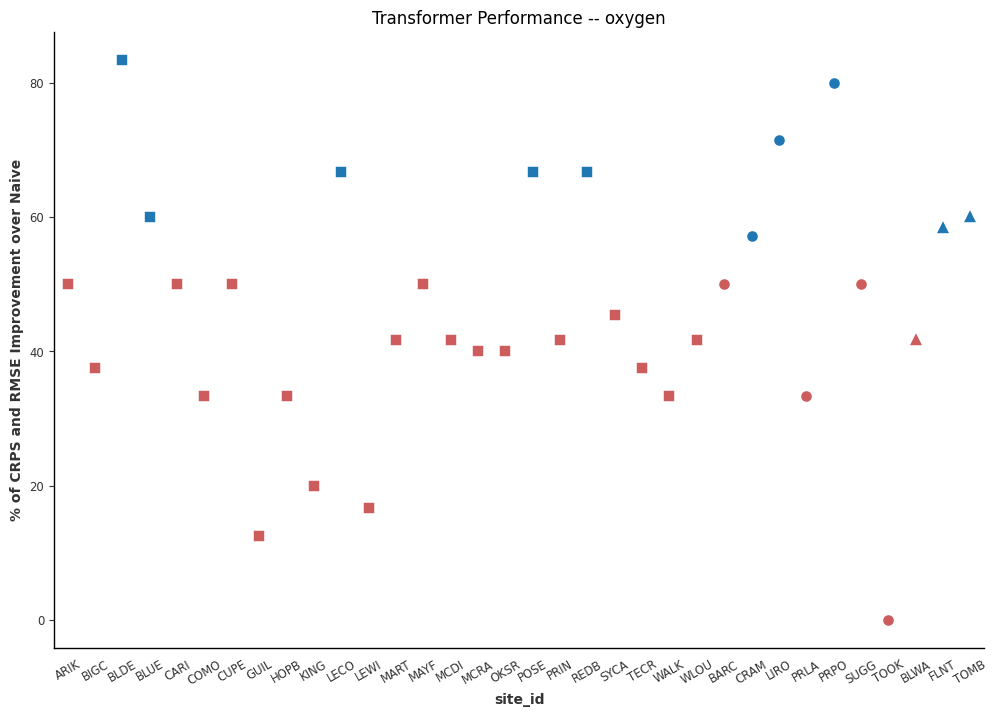

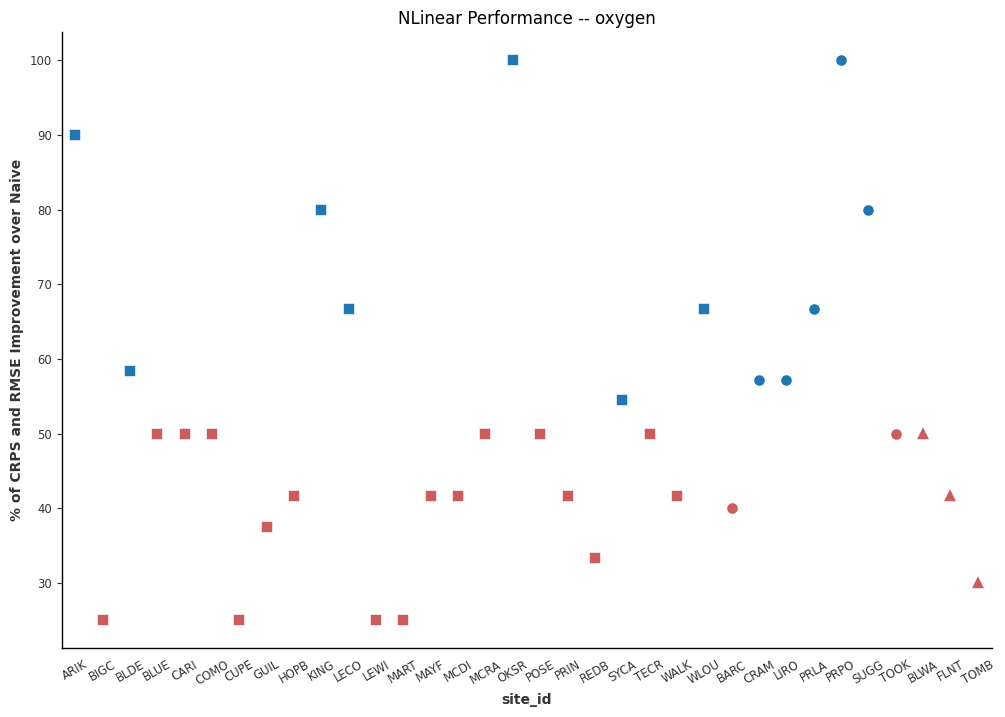

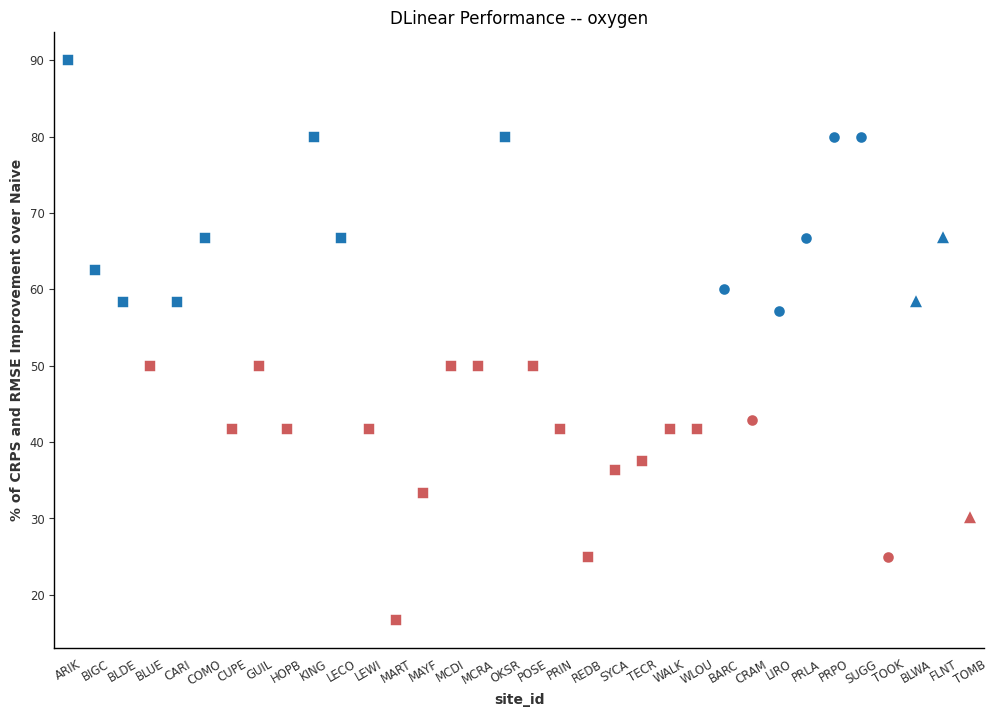

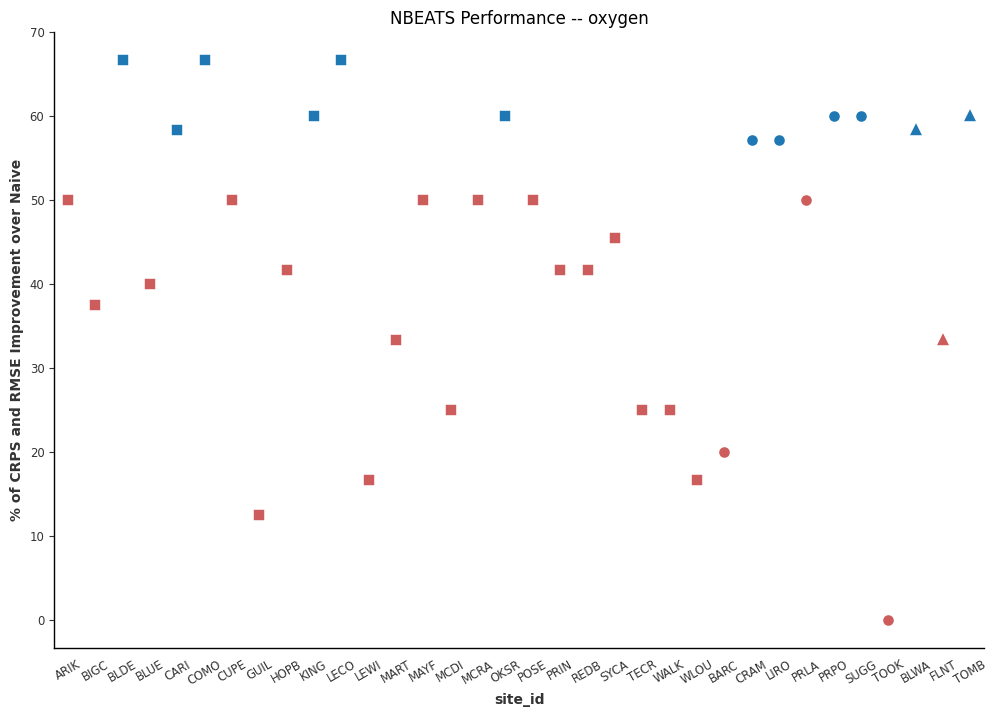

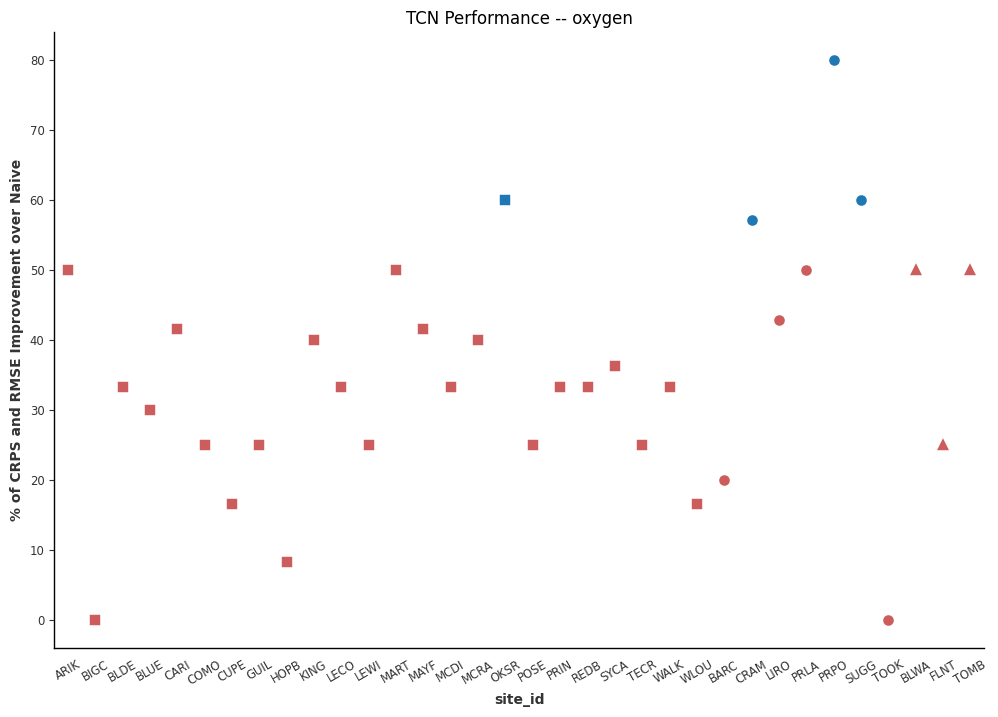

In [20]:
variable = 'oxygen'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable], metadata, f'{model} Performance -- {variable}', historical=False)

##### Temperature

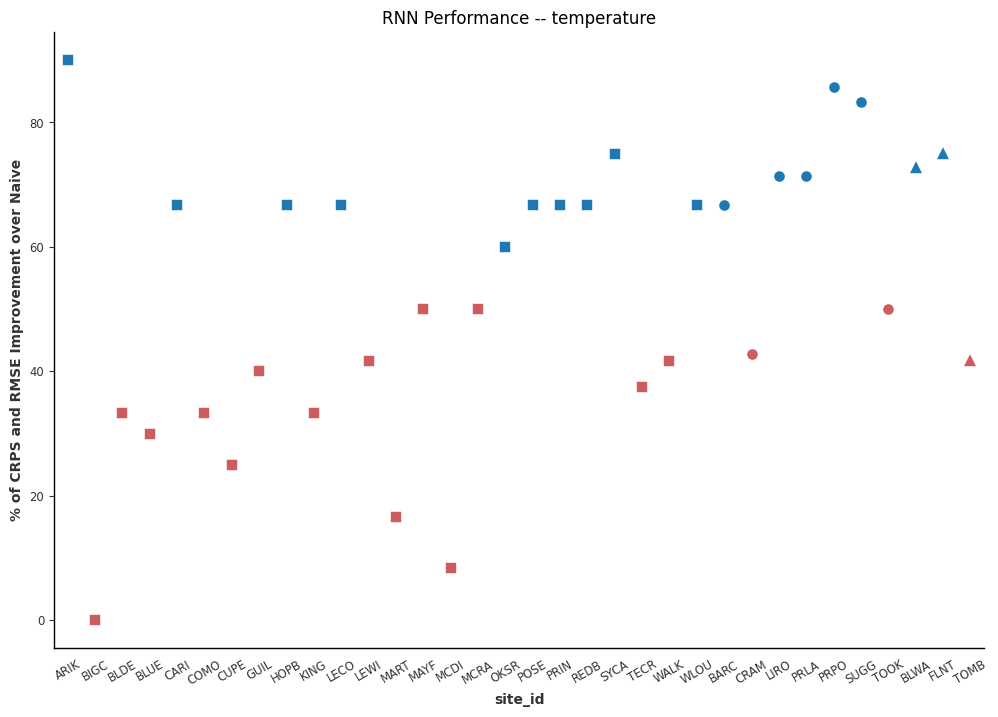

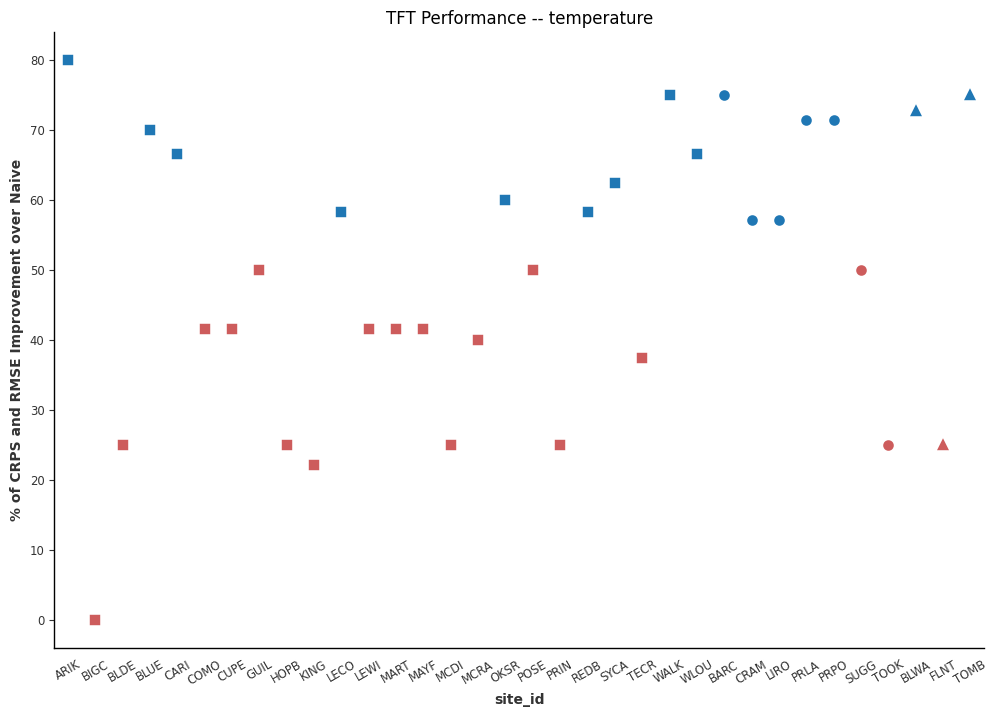

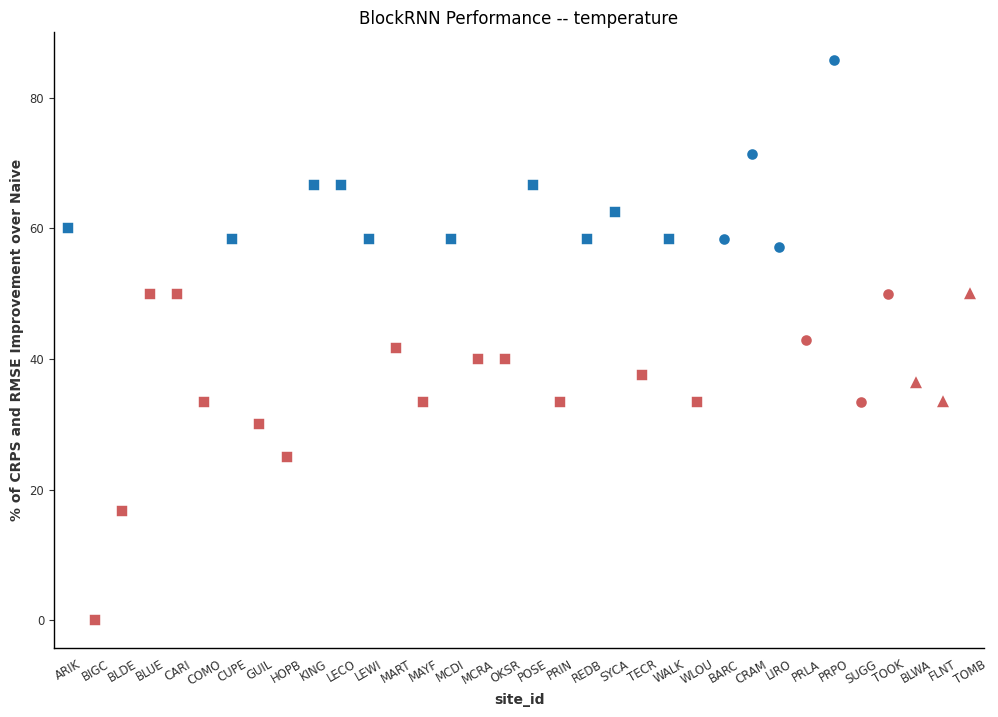

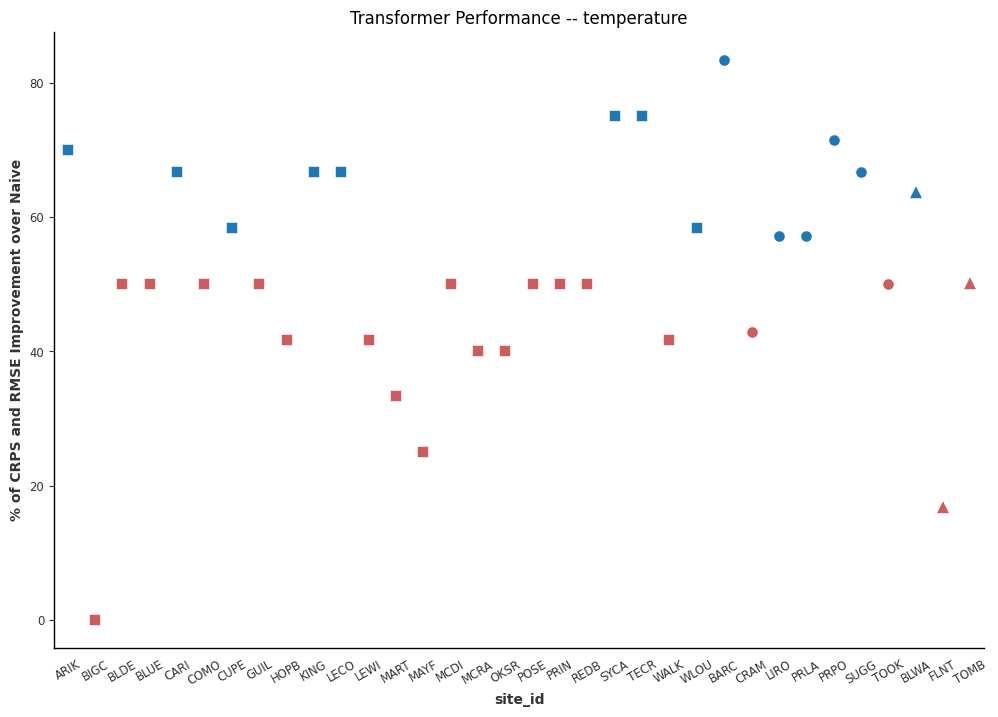

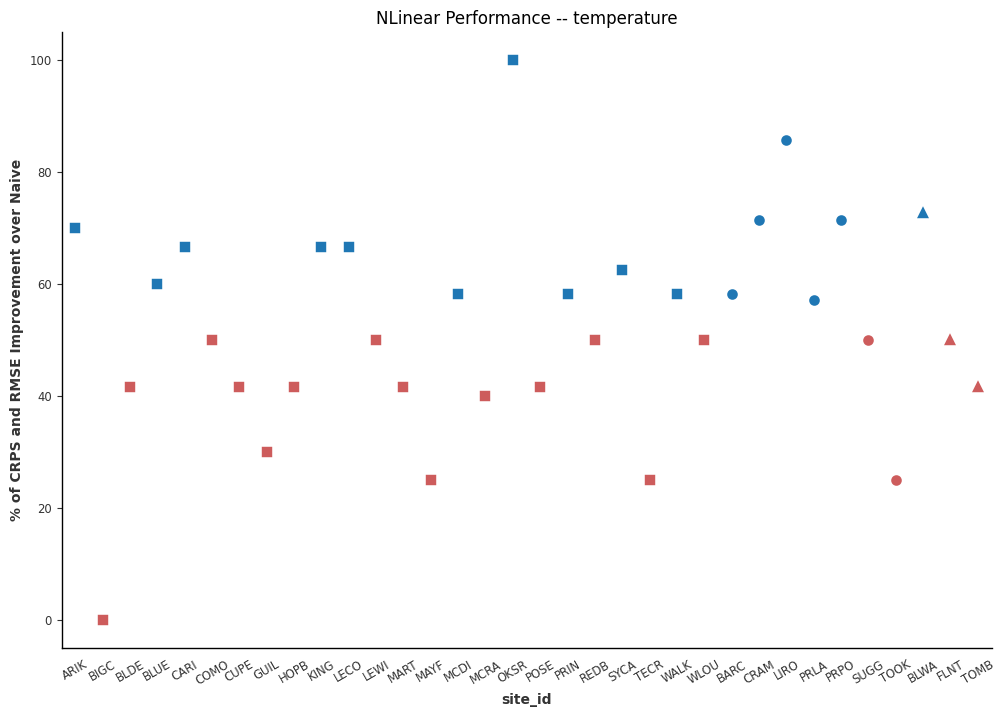

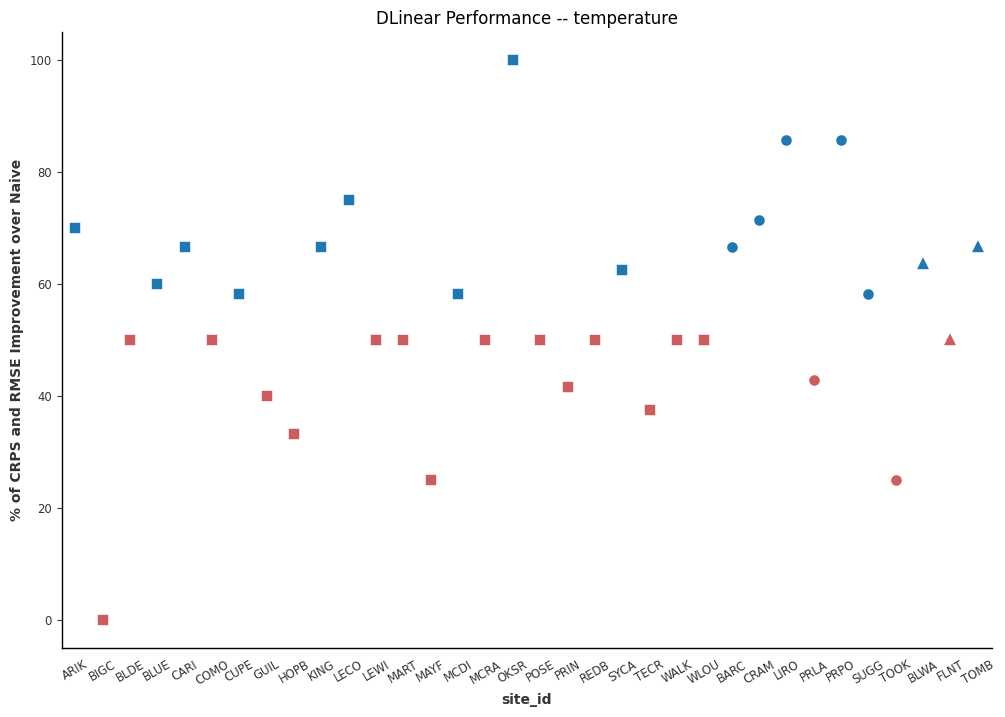

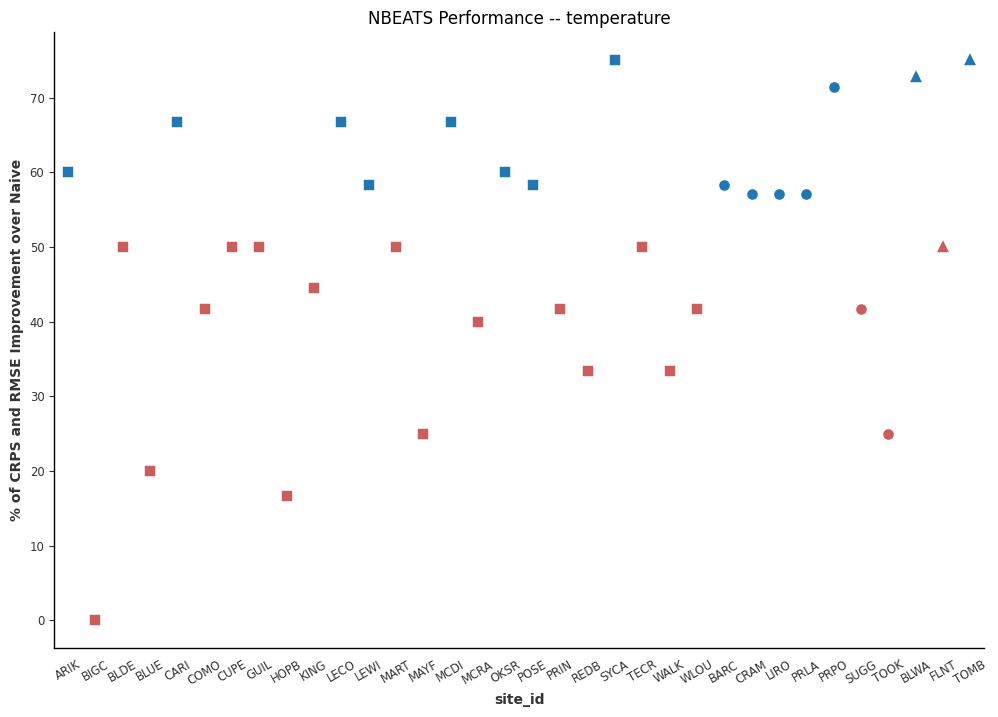

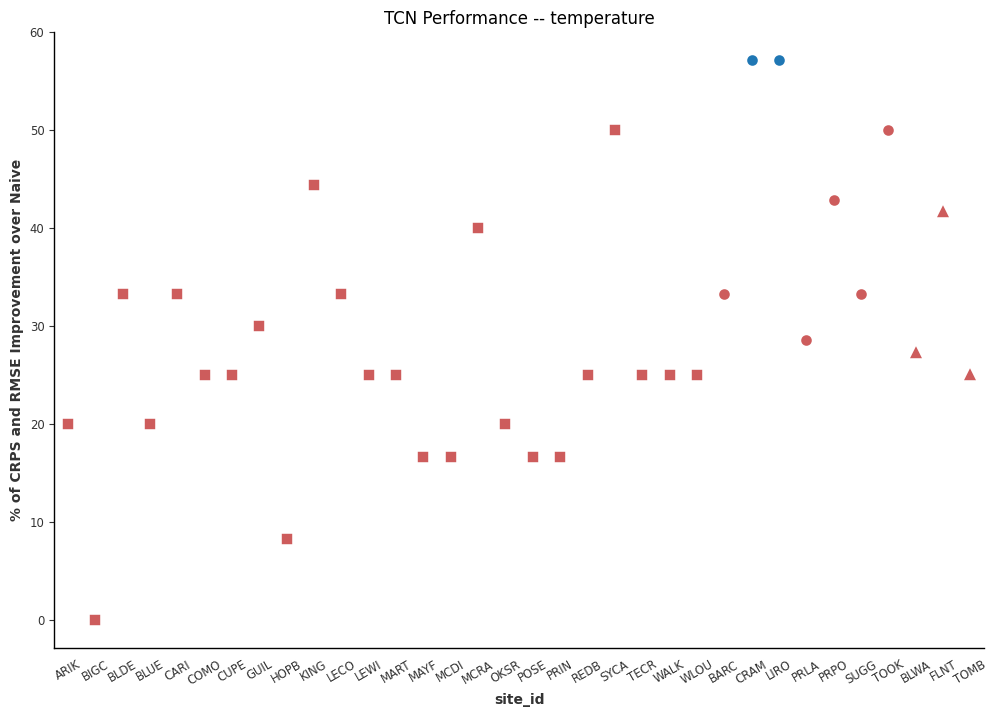

In [21]:
variable = 'temperature'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable], metadata, f'{model} Performance -- {variable}', historical=False)

##### Chla

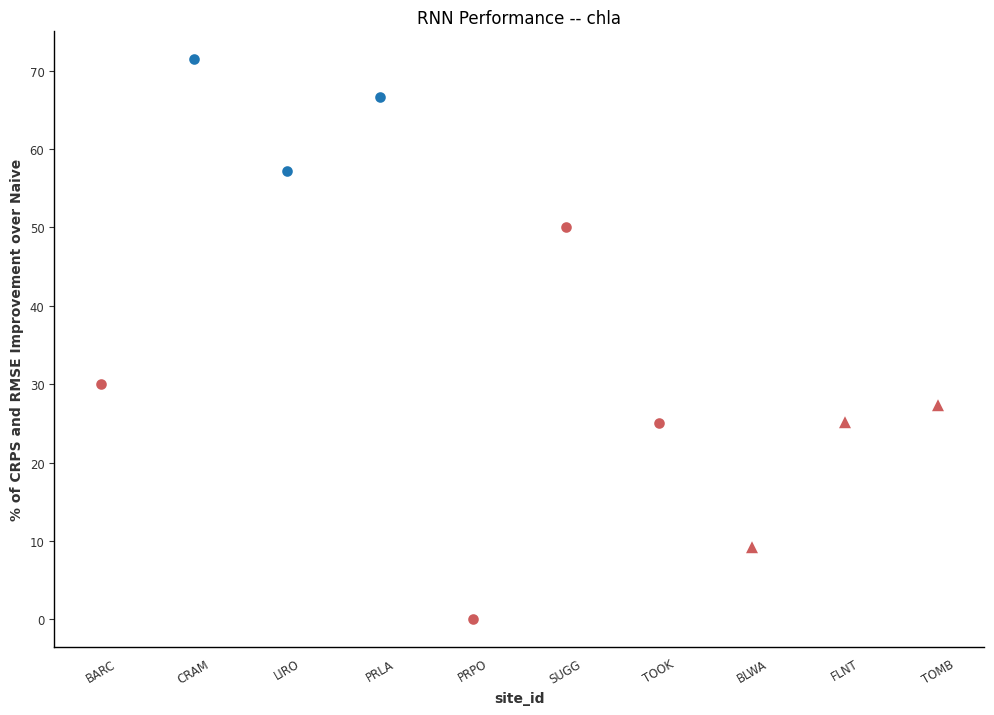

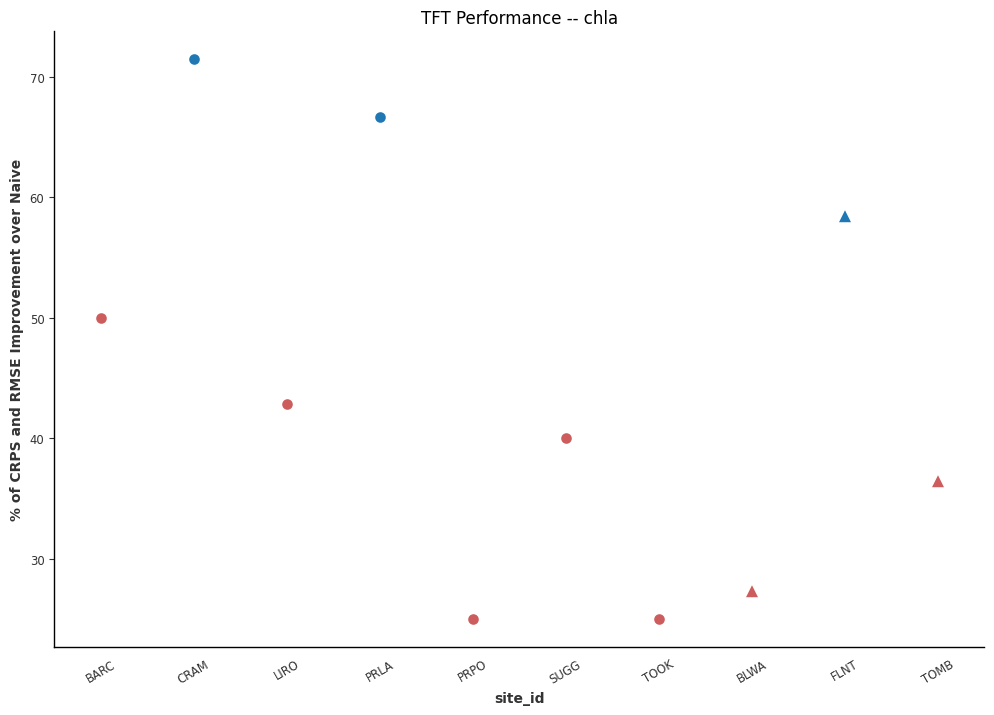

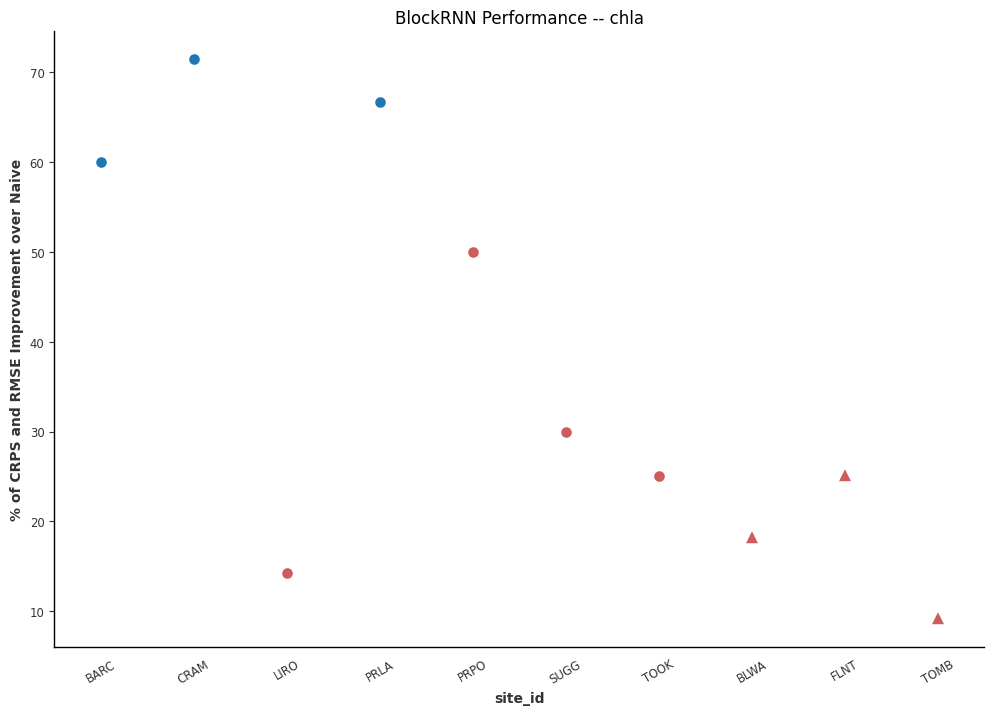

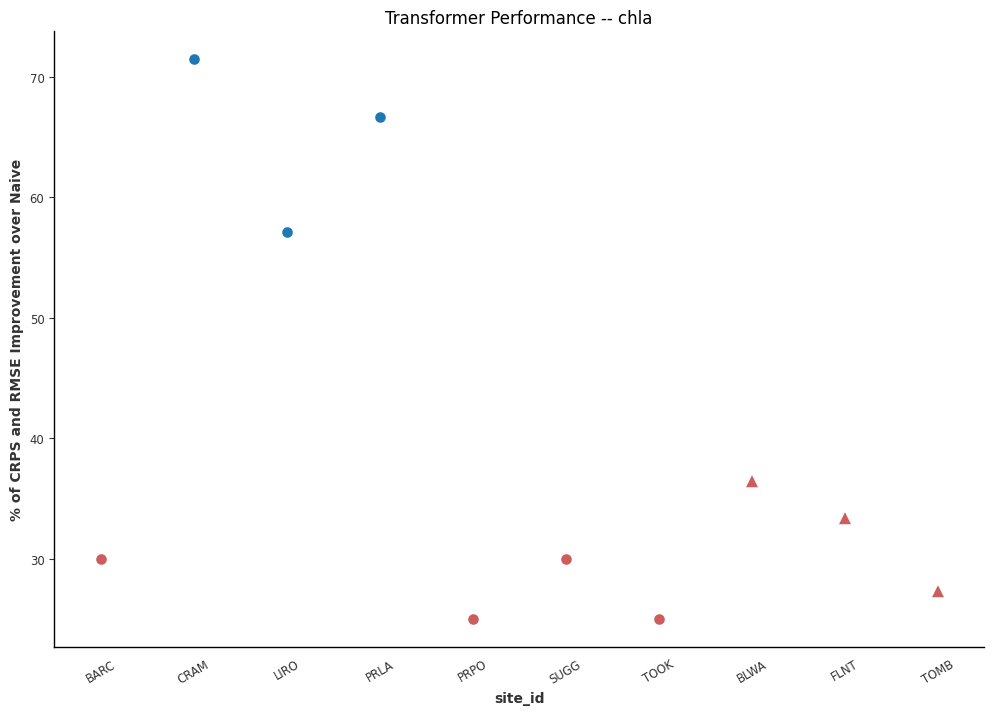

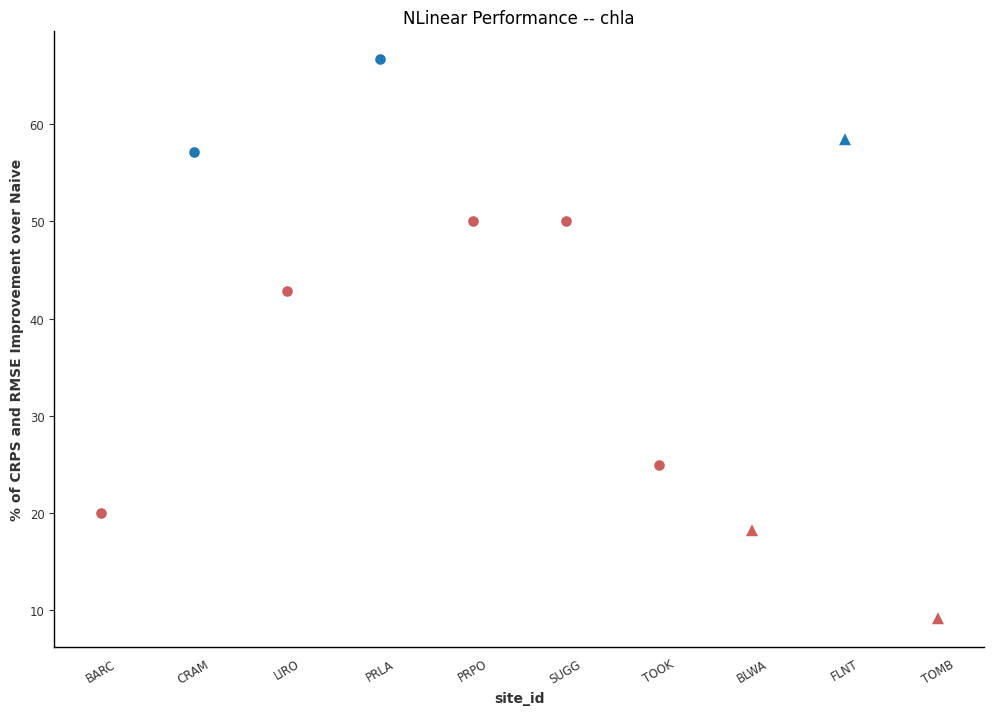

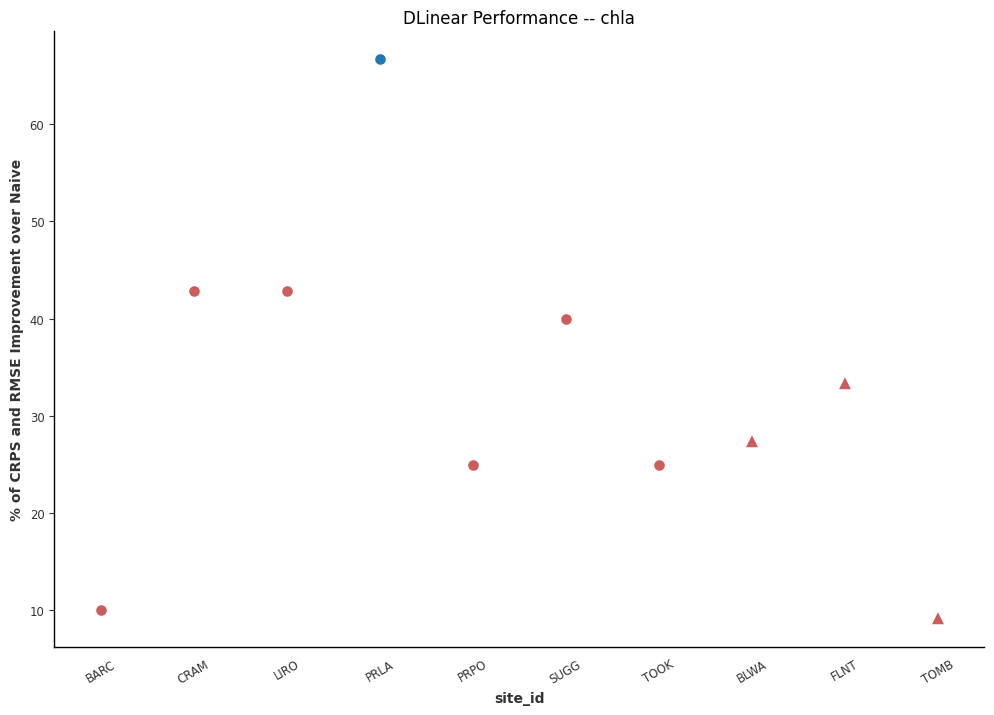

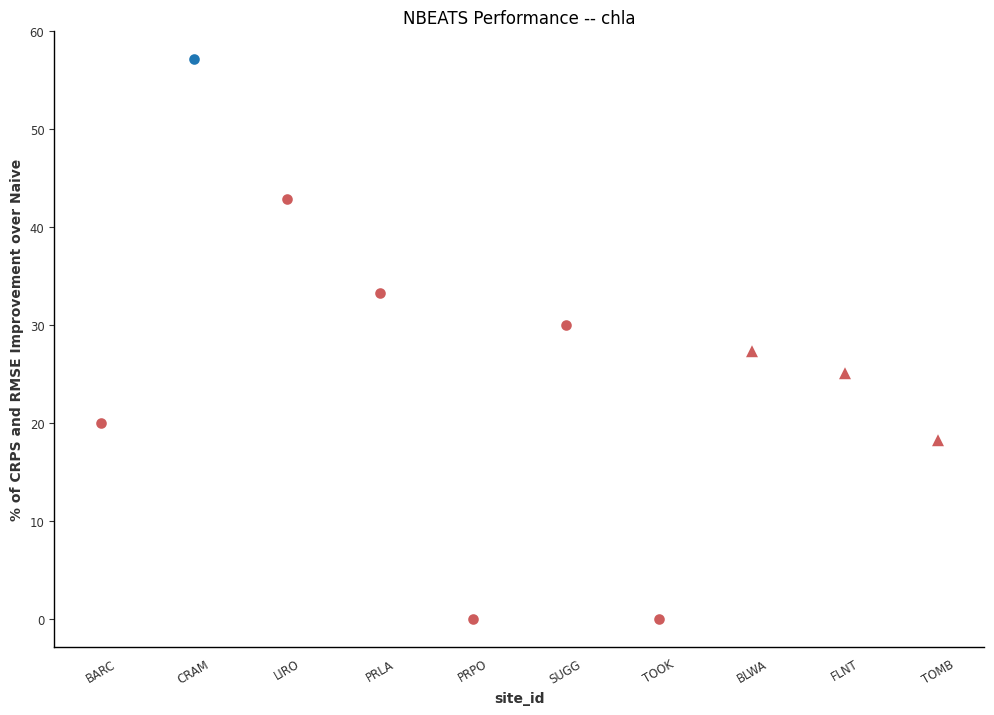

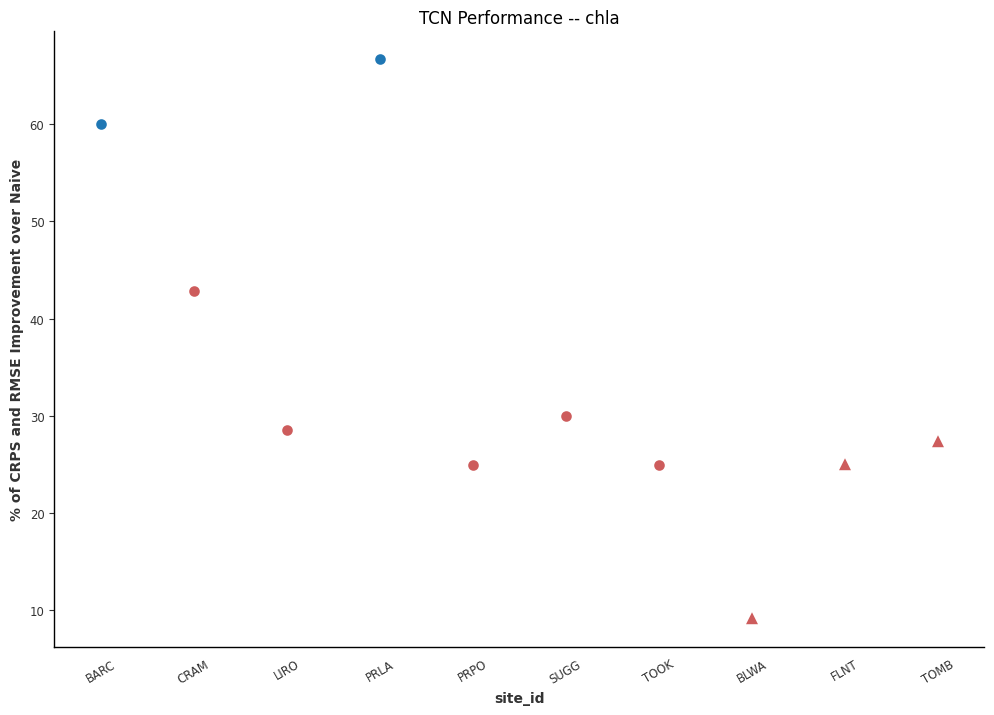

In [22]:
variable = 'chla'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable], metadata, f'{model} Performance -- {variable}', historical=False)